# Derive Spatial Maps
I'm following the guide here: <https://nilearn.github.io/auto_examples/03_connectivity/plot_compare_decomposition.html>.

## Load Data

In [2]:
from os import listdir, makedirs
from os.path import isfile, join, exists

from nilearn.image import concat_imgs
from nilearn.decomposition import CanICA
from nilearn.decomposition import DictLearning
from nilearn.plotting import plot_prob_atlas

In [3]:
aa_folder = 'BioBank_Analysis_All/'
saveresids_folder = 'aamod_firstlevel_modelestimate_saveresids_00001/'

## Train both models (ICA and DictLearning)

In [5]:
canica = CanICA(n_components=20,
                memory="nilearn_cache", memory_level=2,
                verbose=1,
                mask_strategy='template',
                random_state=0)

In [4]:
dict_learning = DictLearning(n_components=20,
                             memory="nilearn_cache", memory_level=2,
                             verbose=1,
                             random_state=0,
                             n_epochs=1,
                             mask_strategy='template')

In [5]:
for age in range(7, 16):
    print("Processing age:", age)
    age_dir = f'/imaging3/owenlab/wilson/MovieData/Release7/Age{age}'

    input_path = join(age_dir, aa_folder, saveresids_folder)

    # Grab all subjects
    subjects = [folder for folder in listdir(input_path) if folder.startswith("sub-")]

    for subject in subjects:
        subject_input_path = join(input_path, subject)
        subject_niftis = [join(subject_input_path, f) for f in listdir(subject_input_path) 
                          if isfile(join(subject_input_path, f)) and f.startswith('ResI')]

        if len(subject_niftis) != 745:
            print("Incomplete subject niftis:", len(subject_niftis))
            continue
        
        subject_4d_nifti = concat_imgs(subject_niftis)
#         canica.fit(subject_4d_nifti)
        dict_learning.fit(subject_4d_nifti)

Processing age: 7
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team w

[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  

[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000191, ..., -0.00121 ],
       ...,
       [-0.000147, ..., -0.002349]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000651, ...,  0.002047],
       ...,
       [-0.002832, ...,  0.002948]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001964, ...,  0.00096 ],
       ...,
       [-0.000709, ...,  0.001058]], dtype=float32), 
array([[-0.913155, ..., -0.703898],
       ...,
       [-1.476396, ..., -2.865268]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.913155, ..., -1.476396],
       ...,
       [-0.703898, ..., -2.865268]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.582414, ...,  0.076964],
       ...,
       [-0.092024, ..., -0.075166]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.7s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.8s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.680633, ...,  1.231312],
       ...,
       [ 0.64314 , ..., -0.894237]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000564, ...,  0.004184],
       ...,
       [-0.001126, ..., -0.001004]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00065 , ...,  0.001756],
       ...,
       [ 0.000332, ...,  0.001864]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.9s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002349, ...,  0.001836],
       ...,
       [ 0.000732, ...,  0.000897]], dtype=float32), 
array([[-2.345083, ..., -4.686975],
       ...,
       [ 5.181878, ..., -1.242954]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-2.345083, ...,  5.181878],
       ...,
       [-4.686975, ..., -1.242954]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.233744, ..., 0.097345],
       ...,
       [0.192775, ..., 0.178845]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_____________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.3s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.345382, ...,  0.303769],
       ...,
       [-0.396121, ...,  0.079966]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001343, ..., -0.000492],
       ...,
       [ 0.001545, ..., -0.004711]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.278717e-03, ..., -3.430450e-04],
       ...,
       [-7.666582e-04, ..., -3.110841e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.004719, ..., 0.004026],
       ...,
       [0.001343, ..., 0.000642]], dtype=float32), 
array([[10.116913, ..., 11.640018],
       ...,
       [-0.526625, ..., -5.04131 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.116913, ..., -0.526625],
       ...,
       [11.640018, ..., -5.04131 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.378687, ..., -0.314418],
       ...,
       [ 0.013874, ..., -0.169656]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.6s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.6s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.708229, ..., -1.115943],
       ...,
       [ 0.680395, ..., -0.841589]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001882, ...,  0.00077 ],
       ...,
       [ 0.00282 , ..., -0.00106 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001479, ..., -0.000158],
       ...,
       [-0.001138, ...,  0.001127]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.9s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002944, ..., -0.002565],
       ...,
       [ 0.000274, ...,  0.000246]], dtype=float32), 
array([[13.976745, ..., 20.950283],
       ...,
       [ 0.825353, ..., -1.136256]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.976745, ...,  0.825353],
       ...,
       [20.950283, ..., -1.136256]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.067315, ..., -0.091704],
       ...,
       [-0.022136, ...,  0.085011]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] Loading data from [Nifti

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.7s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.7s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95110>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.510779, ...,  0.302869],
       ...,
       [-0.556223, ..., -1.582111]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 2.0s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00366 , ..., 0.00139 ],
       ...,
       [0.002127, ..., 0.000672]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000354, ...,  0.002306],
       ...,
       [-0.001207, ...,  0.000337]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 21.0s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001304, ...,  0.000163],
       ...,
       [-0.002019, ..., -0.002073]], dtype=float32), 
array([[15.143991, ...,  8.802741],
       ...,
       [ 1.968783, ...,  0.951634]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.143991, ...,  1.968783],
       ...,
       [ 8.802741, ...,  0.951634]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.086373, ..., -0.041312],
       ...,
       [ 0.121615, ..., -0.185002]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95110>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilearn_c

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.6s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.6s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-2.154027, ..., -0.014197],
       ...,
       [ 3.196251, ...,  0.033509]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002549, ...,  0.02762 ],
       ...,
       [-0.003133, ..., -0.002172]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.733257, ..., -0.005283],
       ...,
       [-0.001089, ..., -0.002994]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.2s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 3.015320e-07, ...,  3.405526e-04],
       ...,
       [ 7.960335e-04, ..., -3.927463e-03]], dtype=float32), 
array([[ 2.151750e+01, ..., -2.644829e+01],
       ...,
       [ 1.389151e-05, ..., -1.092562e-06]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.151750e+01, ...,  1.389151e-05],
       ...,
       [-2.644829e+01, ..., -1.092562e-06]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.02365 , ..., -0.042676],
       ...,
       [ 0.008152, ...,  0.172833]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ...,  0.      ],
       ...,
       [-0.005561, ...,  0.001246]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf5

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95590>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.517392, ..., 0.393663],
       ...,
       [0.987151, ..., 0.812541]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000965, ..., -0.001364],
       ...,
       [ 0.000677, ..., -0.000565]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003519, ...,  0.00117 ],
       ...,
       [ 0.002561, ..., -0.00154 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.9s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002951, ...,  0.003566],
       ...,
       [-0.000497, ...,  0.00463 ]], dtype=float32), 
array([[ 6.738695, ...,  4.726227],
       ...,
       [-1.471471, ..., -0.609133]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 6.738695, ..., -1.471471],
       ...,
       [ 4.726227, ..., -0.609133]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.007183, ..., -0.129132],
       ...,
       [-0.182482, ..., -0.167338]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95590>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.7s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.7s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.221302, ..., 0.766646],
       ...,
       [0.383935, ..., 0.424717]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001011, ...,  0.000991],
       ...,
       [ 0.002033, ..., -0.004462]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003342, ..., 0.001016],
       ...,
       [0.001355, ..., 0.000913]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.588802e-03, ..., -7.947211e-04],
       ...,
       [ 8.546031e-04, ...,  6.755916e-05]], dtype=float32), 
array([[ 5.935895, ..., 11.932892],
       ...,
       [ 1.139101, ..., -5.127211]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.935895, ...,  1.139101],
       ...,
       [11.932892, ..., -5.127211]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.008621, ..., -0.067598],
       ...,
       [-0.200083, ...,  0.121296]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.001805, ..., -0.      ],
       ...,
       [ 0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.3s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7251250>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.188011, ..., -0.289286],
       ...,
       [ 0.305262, ...,  0.412739]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002616, ..., -0.002078],
       ...,
       [ 0.001273, ...,  0.001547]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002846, ...,  0.00294 ],
       ...,
       [-0.002532, ...,  0.001438]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000908, ..., -0.001332],
       ...,
       [-0.001288, ...,  0.000119]], dtype=float32), 
array([[14.491145, ...,  7.052062],
       ...,
       [-2.421322, ...,  1.80225 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.491145, ..., -2.421322],
       ...,
       [ 7.052062, ...,  1.80225 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.310041, ...,  0.00175 ],
       ...,
       [-0.017166, ..., -0.377986]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.    , ...,  0.0121],
       ...,
       [ 0.    , ..., -0.    ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
_____________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.3s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.195464, ...,  0.63104 ],
       ...,
       [-0.030103, ..., -0.251061]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001356, ...,  0.003441],
       ...,
       [ 0.002075, ..., -0.002335]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000339, ..., 0.00147 ],
       ...,
       [0.000899, ..., 0.001721]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000813, ..., -0.0016  ],
       ...,
       [-0.001591, ..., -0.001523]], dtype=float32), 
array([[ 7.980349, ..., 12.208541],
       ...,
       [ 4.206342, ..., -2.854313]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.980349, ...,  4.206342],
       ...,
       [12.208541, ..., -2.854313]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.16675 , ...,  0.012054],
       ...,
       [-0.163094, ..., -0.186341]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.132341, ...,  1.69747 ],
       ...,
       [ 0.009463, ..., -0.886725]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.003191, ...,  0.001839],
       ...,
       [-0.001924, ...,  0.000213]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000749, ..., -0.002282],
       ...,
       [-0.000694, ..., -0.000279]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-3.291895e-05, ...,  5.454387e-05],
       ...,
       [-1.106100e-03, ...,  2.730148e-03]], dtype=float32), 
array([[-14.951318, ...,  -9.016975],
       ...,
       [  2.626673, ...,   0.304296]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-14.951318, ...,   2.626673],
       ...,
       [ -9.016975, ...,   0.304296]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.123335, ...,  0.023181],
       ...,
       [ 0.165017, ..., -0.14954 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.130076, ..., -0.046769],
       ...,
       [ 0.290475, ...,  0.646973]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002262, ..., -0.002333],
       ...,
       [ 0.000561, ..., -0.001078]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000134, ...,  0.000504],
       ...,
       [-0.001199, ..., -0.003566]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.003626, ...,  0.001997],
       ...,
       [-0.001975, ...,  0.001158]], dtype=float32), 
array([[11.429907, ...,  2.835496],
       ...,
       [-2.842381, ..., -1.313614]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.429907, ..., -2.842381],
       ...,
       [ 2.835496, ..., -1.313614]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.415074, ...,  0.349628],
       ...,
       [-0.076872, ...,  0.248054]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.002463, ...,  0.      ],
       ...,
       [ 0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95b10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.068607, ...,  1.491233],
       ...,
       [-0.706581, ...,  1.458187]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002171, ...,  0.00296 ],
       ...,
       [ 0.001282, ..., -0.001178]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003636, ..., -0.000193],
       ...,
       [-0.001331, ..., -0.001405]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000723, ..., -0.000477],
       ...,
       [ 0.001323, ...,  0.000511]], dtype=float32), 
array([[11.022205, ...,  6.50941 ],
       ...,
       [ 3.74252 , ..., -1.489148]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.022205, ...,  3.74252 ],
       ...,
       [ 6.50941 , ..., -1.489148]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.394342, ...,  0.051443],
       ...,
       [-0.152814, ...,  0.000737]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f0a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.014177, ...,  0.796217],
       ...,
       [-0.105679, ..., -1.012642]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001149, ...,  0.003081],
       ...,
       [-0.000506, ...,  0.001573]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000968, ..., -0.001898],
       ...,
       [-0.000737, ...,  0.00603 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001089, ...,  0.000398],
       ...,
       [ 0.00409 , ...,  0.002028]], dtype=float32), 
array([[ 5.375043, ..., -2.366669],
       ...,
       [ 3.852853, ...,  1.966922]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.375043, ...,  3.852853],
       ...,
       [-2.366669, ...,  1.966922]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.090325, ...,  0.389221],
       ...,
       [ 0.007661, ..., -0.190462]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.445776, ..., -0.046305],
       ...,
       [-0.502825, ...,  0.349444]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 1.208073e-03, ..., -3.930515e-03],
       ...,
       [ 2.164222e-04, ...,  2.723505e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002906, ...,  0.000544],
       ...,
       [-0.001077, ...,  0.002229]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000925, ...,  0.002008],
       ...,
       [-0.003351, ..., -0.001946]], dtype=float32), 
array([[ 5.244782, ...,  0.939585],
       ...,
       [-4.740398, ...,  0.032847]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.244782, ..., -4.740398],
       ...,
       [ 0.939585, ...,  0.032847]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.143965, ...,  0.378516],
       ...,
       [-0.681618, ...,  0.398897]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.000996, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.287723, ..., -0.193755],
       ...,
       [-0.315511, ...,  0.195061]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001246, ..., -0.002301],
       ...,
       [ 0.001486, ...,  0.00088 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00036 , ...,  0.001089],
       ...,
       [-0.003127, ...,  0.002048]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.474714e-04, ..., -8.659249e-05],
       ...,
       [ 4.404809e-03, ...,  1.018160e-02]], dtype=float32), 
array([[ 8.063184, ...,  9.615094],
       ...,
       [-2.865468, ...,  1.095917]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.063184, ..., -2.865468],
       ...,
       [ 9.615094, ...,  1.095917]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.023307, ...,  0.275737],
       ...,
       [ 0.051095, ...,  0.172678]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.729888, ..., -0.654832],
       ...,
       [ 1.255563, ...,  0.623311]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002424, ..., -0.003132],
       ...,
       [-0.001185, ..., -0.002692]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000605, ..., -0.000361],
       ...,
       [ 0.009886, ..., -0.001522]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 15.9s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.004892, ..., -0.000181],
       ...,
       [ 0.001607, ..., -0.003415]], dtype=float32), 
array([[12.225283, ..., -5.974849],
       ...,
       [-4.373219, ..., -3.759404]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.225283, ..., -4.373219],
       ...,
       [-5.974849, ..., -3.759404]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.375899, ...,  0.188225],
       ...,
       [ 0.017859, ...,  0.037952]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.51853 , ..., 0.455342],
       ...,
       [0.641131, ..., 0.258235]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000146, ..., -0.001276],
       ...,
       [-0.000843, ..., -0.004725]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00356 , ..., -0.000435],
       ...,
       [-0.002763, ...,  0.001474]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003095, ..., -0.000382],
       ...,
       [ 0.006249, ...,  0.009876]], dtype=float32), 
array([[ 0.728821, ..., -4.211628],
       ...,
       [-1.499849, ..., -5.55463 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 0.728821, ..., -1.499849],
       ...,
       [-4.211628, ..., -5.55463 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.11677 , ..., -0.024874],
       ...,
       [-0.139492, ..., -0.22433 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.466075, ...,  0.876946],
       ...,
       [-0.860685, ...,  2.111598]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002323, ..., -0.001024],
       ...,
       [-0.001613, ..., -0.000243]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001959, ..., -0.001213],
       ...,
       [-0.000333, ...,  0.000558]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003256, ...,  0.002173],
       ...,
       [-0.001901, ..., -0.001148]], dtype=float32), 
array([[10.937419, ..., -7.595055],
       ...,
       [-1.272074, ..., -0.301311]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.937419, ..., -1.272074],
       ...,
       [-7.595055, ..., -0.301311]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.355178, ..., -0.429057],
       ...,
       [-0.292969, ..., -0.371564]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ..., -0.005907],
       ...,
       [ 0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95b10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.533846, ...,  0.081361],
       ...,
       [-0.044797, ..., -0.009562]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001467, ..., -0.002778],
       ...,
       [ 0.003002, ..., -0.00075 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001617, ..., 0.000681],
       ...,
       [0.003115, ..., 0.000746]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001626, ..., -0.002066],
       ...,
       [ 0.003   , ..., -0.001829]], dtype=float32), 
array([[ 6.871184, ..., 14.064602],
       ...,
       [-3.569938, ..., -0.963895]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 6.871184, ..., -3.569938],
       ...,
       [14.064602, ..., -0.963895]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.190669, ...,  0.359146],
       ...,
       [ 0.058302, ..., -0.114178]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95b10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 74

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.015757, ...,  0.256879],
       ...,
       [-0.073479, ..., -0.789242]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002537, ...,  0.001326],
       ...,
       [ 0.001974, ..., -0.002907]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.0028  , ...,  0.001932],
       ...,
       [-0.005197, ..., -0.000983]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001838, ...,  0.000767],
       ...,
       [-0.000818, ...,  0.001388]], dtype=float32), 
array([[13.782808, ..., 10.725876],
       ...,
       [ 1.649997, ..., -3.617492]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.782808, ...,  1.649997],
       ...,
       [10.725876, ..., -3.617492]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.301979, ..., -0.302312],
       ...,
       [ 0.051217, ..., -0.290257]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.008487, ...,  0.058481],
       ...,
       [-0.065581, ...,  0.128521]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000299, ..., -0.003933],
       ...,
       [ 0.001739, ..., -0.003428]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.003839, ...,  0.003965],
       ...,
       [-0.006759, ...,  0.006043]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.002652, ..., 0.000239],
       ...,
       [0.000612, ..., 0.002211]], dtype=float32), 
array([[ 2.189307, ..., 12.75046 ],
       ...,
       [-4.918231, ..., -4.286016]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.189307, ..., -4.918231],
       ...,
       [12.75046 , ..., -4.286016]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.207857, ..., -0.222797],
       ...,
       [ 0.059879, ...,  0.034358]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.7s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.6s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-2.268009, ..., -0.937005],
       ...,
       [-0.395496, ...,  1.759902]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.001944, ..., -0.001774],
       ...,
       [-0.001335, ..., -0.001885]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000344, ..., -0.001006],
       ...,
       [ 0.003033, ..., -0.001464]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000525, ...,  0.000698],
       ...,
       [-0.001492, ..., -0.002087]], dtype=float32), 
array([[-9.951575, ..., -6.834146],
       ...,
       [-2.210041, ..., -2.347494]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-9.951575, ..., -2.210041],
       ...,
       [-6.834146, ..., -2.347494]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.033791, ...,  0.533686],
       ...,
       [ 0.002216, ...,  0.297209]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.906617, ..., -0.003725],
       ...,
       [-0.607786, ...,  0.313864]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001914, ..., -0.001869],
       ...,
       [-0.000706, ..., -0.001936]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001127, ..., -0.000975],
       ...,
       [ 0.001965, ..., -0.000983]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000869, ..., -0.000629],
       ...,
       [-0.002127, ..., -0.002198]], dtype=float32), 
array([[11.300584, ..., -4.169547],
       ...,
       [-2.092628, ..., -2.167352]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.300584, ..., -2.092628],
       ...,
       [-4.169547, ..., -2.167352]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.139113, ..., -0.113484],
       ...,
       [ 0.619058, ...,  0.163894]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.      , ..., -0.000203]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0890>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 26.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.29604 , ...,  1.591641],
       ...,
       [-0.814218, ...,  0.510902]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002   , ..., -0.000542],
       ...,
       [-0.001659, ..., -0.000636]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000873, ..., -0.002748],
       ...,
       [ 0.001298, ..., -0.002358]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.006308, ..., -0.002244],
       ...,
       [ 0.002038, ...,  0.000773]], dtype=float32), 
array([[ 8.480734, ..., -7.03643 ],
       ...,
       [-0.653568, ..., -0.767833]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.480734, ..., -0.653568],
       ...,
       [-7.03643 , ..., -0.767833]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.050874, ...,  0.383375],
       ...,
       [ 0.031178, ..., -0.224904]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.001624, ..., -0.      ],
       ...,
       [ 0.006433, ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38ad0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.041823, ...,  0.041948],
       ...,
       [-0.051023, ...,  0.051909]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-3.267487e-03, ...,  1.858481e-02],
       ...,
       [-1.387700e-03, ...,  9.596999e-06]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.537834e-02, ..., -6.136074e-03],
       ...,
       [ 5.959775e-05, ..., -2.131432e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.8s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-4.006645e-02, ...,  1.245012e-04],
       ...,
       [-5.592075e-03, ...,  8.912326e-05]], dtype=float32), 
array([[-2.502709e+01, ..., -1.062899e+01],
       ...,
       [ 8.583819e-05, ...,  4.432594e-08]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-2.502709e+01, ...,  8.583819e-05],
       ...,
       [-1.062899e+01, ...,  4.432594e-08]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.000785, ...,  0.21506 ],
       ...,
       [-0.000583, ...,  0.065779]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e7d0>)
_________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.37111 , ..., -0.417794],
       ...,
       [-0.452238, ...,  0.203235]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001362, ...,  0.000582],
       ...,
       [ 0.000943, ..., -0.002632]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00414 , ..., -0.000255],
       ...,
       [-0.00074 , ...,  0.001367]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 11.5s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002339, ..., -0.00395 ],
       ...,
       [-0.00446 , ..., -0.001003]], dtype=float32), 
array([[ 7.211831, ...,  4.991907],
       ...,
       [ 0.683422, ..., -3.092726]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.211831, ...,  0.683422],
       ...,
       [ 4.991907, ..., -3.092726]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.038033, ...,  0.262654],
       ...,
       [-0.572968, ...,  0.114621]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.513417, ..., 0.841612],
       ...,
       [0.185036, ..., 0.004262]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000403, ..., -0.002828],
       ...,
       [ 0.002965, ...,  0.000499]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002527, ...,  0.000662],
       ...,
       [-0.002517, ...,  0.00131 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00019 , ..., -0.001907],
       ...,
       [-0.002564, ..., -0.00021 ]], dtype=float32), 
array([[ 2.096737, ..., 15.423957],
       ...,
       [-3.552735, ...,  0.627281]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.096737, ..., -3.552735],
       ...,
       [15.423957, ...,  0.627281]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.422525, ...,  0.369908],
       ...,
       [-0.167856, ...,  0.073506]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.014562, ...,  0.407003],
       ...,
       [ 0.859286, ...,  0.267089]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 9.799455e-05, ..., -1.657782e-03],
       ...,
       [-4.741637e-04, ..., -4.184900e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.003616, ...,  0.000579],
       ...,
       [-0.004444, ..., -0.00084 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.9s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.054756e-03, ...,  5.340076e-04],
       ...,
       [-7.442369e-05, ..., -7.901056e-05]], dtype=float32), 
array([[ 0.580181, ..., -2.807306],
       ...,
       [-2.146652, ..., -5.419001]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 0.580181, ..., -2.146652],
       ...,
       [-2.807306, ..., -5.419001]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.010109, ..., -0.121832],
       ...,
       [-0.16393 , ..., -0.124589]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.225097, ...,  0.57215 ],
       ...,
       [-0.012455, ..., -0.260527]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002425, ..., -0.003628],
       ...,
       [ 0.000685, ...,  0.001512]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000901, ...,  0.002246],
       ...,
       [-0.001331, ..., -0.000802]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000461, ..., -0.000149],
       ...,
       [ 0.002103, ...,  0.01088 ]], dtype=float32), 
array([[13.762767, ...,  3.886914],
       ...,
       [-4.187328, ...,  1.744931]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.762767, ..., -4.187328],
       ...,
       [ 3.886914, ...,  1.744931]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.202103, ...,  0.042831],
       ...,
       [-0.182957, ...,  0.090623]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.571822, ..., -0.479311],
       ...,
       [-2.084193, ..., -0.043444]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00072 , ..., -0.000461],
       ...,
       [-0.001032, ..., -0.001133]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001242, ...,  0.006276],
       ...,
       [ 0.000208, ..., -0.002063]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 9.4s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001757, ..., -0.001464],
       ...,
       [ 0.00072 , ..., -0.000783]], dtype=float32), 
array([[ 4.889005, ..., -7.01102 ],
       ...,
       [-0.459555, ..., -1.128658]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.889005, ..., -0.459555],
       ...,
       [-7.01102 , ..., -1.128658]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.091852, ...,  0.386773],
       ...,
       [ 0.046782, ...,  0.106758]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 28.9s, 0.5min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.008352, ...,  0.001381],
       ...,
       [ 0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.492258, ...,  0.334333],
       ...,
       [-0.790643, ...,  0.037241]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001787, ..., -0.002625],
       ...,
       [ 0.000915, ..., -0.001102]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002667, ...,  0.002015],
       ...,
       [-0.002123, ..., -0.001627]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.000895, ..., 0.008268],
       ...,
       [0.003433, ..., 0.000727]], dtype=float32), 
array([[11.340703, ...,  5.80523 ],
       ...,
       [-2.919397, ..., -1.224948]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.340703, ..., -2.919397],
       ...,
       [ 5.80523 , ..., -1.224948]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.223528, ..., -0.118434],
       ...,
       [ 0.034037, ..., -0.450017]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.189279, ...,  0.234539],
       ...,
       [-1.346366, ..., -0.969025]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-2.050052e-04, ...,  4.056899e-03],
       ...,
       [-1.156085e-05, ...,  6.563107e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-6.699179e-05, ...,  3.225276e-04],
       ...,
       [-2.570667e-03, ..., -1.463840e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[5.021116e-05, ..., 5.170930e-03],
       ...,
       [8.661771e-04, ..., 1.007450e-04]], dtype=float32), 
array([[-1.123143, ..., -0.063337],
       ...,
       [ 5.23891 , ...,  8.475322]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.123143, ...,  5.23891 ],
       ...,
       [-0.063337, ...,  8.475322]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.007881, ..., 0.142083],
       ...,
       [0.083006, ..., 0.179651]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>)
_____________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.781759, ...,  1.368173],
       ...,
       [-0.602898, ...,  1.044204]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002061, ...,  0.000635],
       ...,
       [-0.001436, ...,  0.000301]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00049 , ..., -0.002986],
       ...,
       [ 0.004227, ..., -0.00231 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001704, ..., -0.001746],
       ...,
       [-0.001099, ..., -0.000143]], dtype=float32), 
array([[ 8.742985, ..., -6.092399],
       ...,
       [ 0.801403, ...,  0.38008 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.742985, ...,  0.801403],
       ...,
       [-6.092399, ...,  0.38008 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.113892, ...,  0.255181],
       ...,
       [ 0.092645, ..., -0.314523]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.012204, ..., 0.      ],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.163513, ..., -0.159367],
       ...,
       [-0.068425, ..., -0.077589]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000146, ..., -0.000225],
       ...,
       [-0.002259, ..., -0.001277]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000904, ..., -0.003068],
       ...,
       [ 0.000384, ..., -0.002384]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000412, ..., -0.001146],
       ...,
       [ 0.003389, ...,  0.003714]], dtype=float32), 
array([[  0.705164, ..., -10.884272],
       ...,
       [ -0.289559, ...,  -1.643959]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[  0.705164, ...,  -0.289559],
       ...,
       [-10.884272, ...,  -1.643959]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.151036, ...,  0.723322],
       ...,
       [-0.041381, ...,  0.049664]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.353801, ...,  1.165358],
       ...,
       [ 0.230289, ...,  1.607865]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000904, ...,  0.000462],
       ...,
       [-0.000677, ..., -0.000815]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002711, ..., -0.001753],
       ...,
       [ 0.003696, ..., -0.001401]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000168, ...,  0.002419],
       ...,
       [-0.003771, ..., -0.000858]], dtype=float32), 
array([[ 4.794411, ..., -3.589134],
       ...,
       [ 0.562986, ..., -0.992984]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.794411, ...,  0.562986],
       ...,
       [-3.589134, ..., -0.992984]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.101959, ..., -0.093863],
       ...,
       [-0.111455, ...,  0.169246]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f0a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.300658, ..., -0.97386 ],
       ...,
       [ 2.073932, ..., -0.789862]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001414, ..., 0.00016 ],
       ...,
       [0.003154, ..., 0.002689]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000259, ...,  0.00194 ],
       ...,
       [ 0.000904, ...,  0.00202 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002201, ...,  0.000477],
       ...,
       [ 0.001511, ..., -0.001611]], dtype=float32), 
array([[ 7.23371 , ..., 16.133907],
       ...,
       [ 0.19151 , ...,  3.218931]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.23371 , ...,  0.19151 ],
       ...,
       [16.133907, ...,  3.218931]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.077023, ..., -0.079744],
       ...,
       [-0.003041, ..., -0.297419]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ...,  0.      ],
       ...,
       [ 0.      , ...,  0.007775]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e150>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.229999, ...,  0.701838],
       ...,
       [ 0.565267, ..., -0.268985]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000352, ..., -0.003188],
       ...,
       [ 0.001993, ...,  0.002845]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000838, ..., 0.005259],
       ...,
       [0.003887, ..., 0.001723]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.4s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00115 , ..., -0.000838],
       ...,
       [ 0.00254 , ..., -0.000952]], dtype=float32), 
array([[ 2.409628, ..., 13.653218],
       ...,
       [-3.376533, ...,  3.013004]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.409628, ..., -3.376533],
       ...,
       [13.653218, ...,  3.013004]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.096428, ..., 0.188326],
       ...,
       [0.079725, ..., 0.009533]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e150>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.429493, ...,  0.57973 ],
       ...,
       [ 0.476211, ...,  1.150159]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001852, ..., 0.003002],
       ...,
       [0.001047, ..., 0.000539]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-3.651347e-05, ...,  1.161089e-03],
       ...,
       [-1.618768e-03, ...,  1.756618e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000282, ...,  0.001081],
       ...,
       [-0.000299, ..., -0.00362 ]], dtype=float32), 
array([[9.382803, ..., 5.306423],
       ...,
       [3.601528, ..., 0.646669]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[9.382803, ..., 3.601528],
       ...,
       [5.306423, ..., 0.646669]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.131705, ...,  0.179977],
       ...,
       [-0.313553, ..., -0.140949]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.657743, ..., -1.273811],
       ...,
       [-0.700581, ...,  1.323789]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000174, ..., -0.00069 ],
       ...,
       [ 0.00248 , ...,  0.000269]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002821, ...,  0.001904],
       ...,
       [-0.002848, ...,  0.001969]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.4s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000191, ...,  0.000663],
       ...,
       [-0.00217 , ..., -0.000462]], dtype=float32), 
array([[-0.78472 , ..., 11.210935],
       ...,
       [-0.849068, ...,  0.330509]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.78472 , ..., -0.849068],
       ...,
       [11.210935, ...,  0.330509]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.527774, ...,  0.090101],
       ...,
       [-0.219954, ..., -0.449448]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.130872, ..., -0.011628],
       ...,
       [ 0.524404, ...,  0.636588]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003275, ...,  0.000815],
       ...,
       [ 0.002843, ..., -0.001923]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000493, ...,  0.000756],
       ...,
       [-0.002092, ...,  0.002706]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000666, ...,  0.001034],
       ...,
       [-0.001813, ..., -0.000673]], dtype=float32), 
array([[13.453999, ..., 11.682029],
       ...,
       [ 1.064227, ..., -2.511004]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.453999, ...,  1.064227],
       ...,
       [11.682029, ..., -2.511004]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.388433, ..., -0.103914],
       ...,
       [-0.015787, ...,  0.025844]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.010364, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.624036, ..., -0.696163],
       ...,
       [-0.13313 , ..., -0.579608]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001459, ..., 0.004974],
       ...,
       [0.0017  , ..., 0.000603]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001848, ...,  0.003359],
       ...,
       [ 0.005249, ..., -0.003696]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 7.0s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002208, ..., -0.00092 ],
       ...,
       [-0.000557, ..., -0.00034 ]], dtype=float32), 
array([[ 9.635174, ..., 11.225714],
       ...,
       [ 5.534099, ...,  0.670561]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.635174, ...,  5.534099],
       ...,
       [11.225714, ...,  0.670561]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.779863, ...,  0.166402],
       ...,
       [ 0.084048, ...,  0.028117]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.376567, ...,  2.009911],
       ...,
       [-1.542031, ...,  0.59916 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000163, ..., -0.00449 ],
       ...,
       [ 0.000778, ..., -0.003268]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000938, ..., -0.001487],
       ...,
       [-0.000924, ..., -0.001771]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 19.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00216 , ...,  0.004671],
       ...,
       [-0.001551, ..., -0.001607]], dtype=float32), 
array([[ 1.193823, ...,  5.71189 ],
       ...,
       [-4.901847, ..., -3.567732]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.193823, ..., -4.901847],
       ...,
       [ 5.71189 , ..., -3.567732]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.026674, ...,  0.075021],
       ...,
       [-0.008049, ..., -0.325406]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.006661, ...,  0.005247],
       ...,
       [-0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdfd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.492903, ..., -0.836048],
       ...,
       [ 0.23254 , ...,  0.183623]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000174, ..., -0.00034 ],
       ...,
       [-0.000475, ...,  0.002684]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001733, ...,  0.000586],
       ...,
       [-0.002901, ..., -0.00018 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002923, ...,  0.000182],
       ...,
       [-0.002537, ...,  0.000171]], dtype=float32), 
array([[-0.823053, ..., -2.239248],
       ...,
       [-0.424224, ...,  3.35331 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.823053, ..., -0.424224],
       ...,
       [-2.239248, ...,  3.35331 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.16713 , ..., -0.161747],
       ...,
       [ 0.119835, ...,  0.126566]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdfd0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95250>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.249955, ...,  0.084884],
       ...,
       [ 1.252188, ...,  1.052428]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000679, ...,  0.001061],
       ...,
       [ 0.001134, ..., -0.001633]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-3.107162e-05, ...,  2.305060e-04],
       ...,
       [-5.201872e-03, ...,  2.118226e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000117, ..., -0.001636],
       ...,
       [-0.001111, ..., -0.002707]], dtype=float32), 
array([[ 3.041461, ...,  5.080853],
       ...,
       [ 1.298543, ..., -1.998894]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.041461, ...,  1.298543],
       ...,
       [ 5.080853, ..., -1.998894]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.072704, ..., -0.123446],
       ...,
       [-0.125971, ...,  0.069699]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95250>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e950d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.696379, ...,  1.722823],
       ...,
       [-1.385148, ...,  1.496879]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00247 , ..., -0.000114],
       ...,
       [ 0.001923, ..., -0.001879]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001768, ...,  0.002825],
       ...,
       [-0.001778, ...,  0.002404]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000347, ..., -0.003394],
       ...,
       [ 0.001552, ..., -0.001365]], dtype=float32), 
array([[10.311575, ...,  8.024885],
       ...,
       [-0.172574, ..., -2.844259]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.311575, ..., -0.172574],
       ...,
       [ 8.024885, ..., -2.844259]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.158941, ..., -0.005066],
       ...,
       [-0.017952, ...,  0.192954]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ..., -0.      ],
       ...,
       [-0.006153, ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e950d0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.519582, ...,  0.256747],
       ...,
       [ 0.177933, ...,  1.229659]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00048 , ..., -0.003151],
       ...,
       [ 0.000765, ..., -0.000762]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002196, ..., -0.002253],
       ...,
       [ 0.001083, ..., -0.001904]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002466, ...,  0.001453],
       ...,
       [-0.001482, ..., -0.0023  ]], dtype=float32), 
array([[ 2.649692, ...,  4.221701],
       ...,
       [-3.676353, ..., -0.888928]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.649692, ..., -3.676353],
       ...,
       [ 4.221701, ..., -0.888928]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.208397, ...,  0.057112],
       ...,
       [-0.378543, ...,  0.110207]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.755241, ..., 1.062368],
       ...,
       [0.073249, ..., 0.388616]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002069, ..., 0.002421],
       ...,
       [0.000896, ..., 0.001428]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.040229e-05, ...,  2.479720e-03],
       ...,
       [ 6.629699e-04, ..., -1.395298e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.097822e-03, ...,  7.677197e-05],
       ...,
       [ 1.211666e-05, ...,  7.398537e-04]], dtype=float32), 
array([[12.471461, ...,  5.39934 ],
       ...,
       [ 2.913181, ...,  1.718726]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.471461, ...,  2.913181],
       ...,
       [ 5.39934 , ...,  1.718726]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.420089, ..., -0.013394],
       ...,
       [-0.080883, ...,  0.043328]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38390>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.422386, ...,  0.597922],
       ...,
       [ 0.20807 , ...,  0.38445 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002723, ..., -0.000249],
       ...,
       [ 0.002586, ..., -0.000977]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001998, ..., 0.002898],
       ...,
       [0.002095, ..., 0.003607]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001433, ..., -0.001347],
       ...,
       [-0.001884, ..., -0.002267]], dtype=float32), 
array([[15.992482, ..., 15.187869],
       ...,
       [-0.281807, ..., -1.105253]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.992482, ..., -0.281807],
       ...,
       [15.187869, ..., -1.105253]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.638238, ...,  0.057218],
       ...,
       [-0.027326, ..., -0.11884 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.006293, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251e90>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.803452, ..., -0.229194],
       ...,
       [-0.323361, ...,  0.831369]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002683, ..., -0.000637],
       ...,
       [ 0.001637, ..., -0.000157]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000273, ...,  0.002082],
       ...,
       [-0.000455, ...,  0.001734]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.004035, ..., 0.009169],
       ...,
       [0.000666, ..., 0.000795]], dtype=float32), 
array([[18.15356 , ..., 11.07614 ],
       ...,
       [-0.727605, ..., -0.179925]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[18.15356 , ..., -0.727605],
       ...,
       [11.07614 , ..., -0.179925]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.031205, ...,  0.153503],
       ...,
       [ 0.144228, ...,  0.183457]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.0567  , ..., -0.57669 ],
       ...,
       [ 0.307291, ...,  1.058825]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000744, ..., -0.002265],
       ...,
       [ 0.000526, ..., -0.002452]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000168, ..., 0.002936],
       ...,
       [0.000528, ..., 0.002841]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.365298e-05, ..., -1.144531e-03],
       ...,
       [ 6.779486e-04, ..., -8.039951e-04]], dtype=float32), 
array([[ 3.407557, ...,  2.410394],
       ...,
       [-2.811366, ..., -3.043309]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.407557, ..., -2.811366],
       ...,
       [ 2.410394, ..., -3.043309]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.39384 , ..., -0.214369],
       ...,
       [ 0.030894, ...,  0.306559]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.003125, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.066106, ..., 3.294634],
       ...,
       [0.036896, ..., 2.673723]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000545, ...,  0.001349],
       ...,
       [-0.001447, ..., -0.004092]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000897, ..., -0.003724],
       ...,
       [-0.003858, ..., -0.001169]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001269, ..., -0.001544],
       ...,
       [ 0.005413, ...,  0.004334]], dtype=float32), 
array([[-3.09641 , ..., -8.214138],
       ...,
       [ 1.591934, ..., -4.829039]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-3.09641 , ...,  1.591934],
       ...,
       [-8.214138, ..., -4.829039]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.050109, ...,  0.127596],
       ...,
       [ 0.094593, ..., -0.001566]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e951d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.648457, ..., 0.623991],
       ...,
       [2.289564, ..., 0.64695 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002557, ...,  0.00087 ],
       ...,
       [-0.001994, ...,  0.000519]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-8.398322e-05, ...,  3.186605e-03],
       ...,
       [ 9.629079e-04, ...,  2.595632e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00327 , ...,  0.00039 ],
       ...,
       [-0.001538, ...,  0.000629]], dtype=float32), 
array([[-13.822   , ..., -10.782315],
       ...,
       [  1.026933, ...,   0.612704]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-13.822   , ...,   1.026933],
       ...,
       [-10.782315, ...,   0.612704]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.077133, ..., -0.0076  ],
       ...,
       [ 0.095068, ...,  0.040849]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e951d0>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.798017, ..., -0.983382],
       ...,
       [ 0.040605, ..., -1.091355]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000728, ...,  0.003117],
       ...,
       [ 0.001471, ...,  0.000316]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-1.256826e-05, ...,  7.736338e-05],
       ...,
       [-4.024276e-03, ...,  3.298603e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 2.9s, 0.0min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001919, ...,  0.000631],
       ...,
       [ 0.002688, ..., -0.002904]], dtype=float32), 
array([[-3.291619, ...,  6.653722],
       ...,
       [ 3.855498, ...,  0.390253]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-3.291619, ...,  3.855498],
       ...,
       [ 6.653722, ...,  0.390253]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.431002, ..., -0.10072 ],
       ...,
       [-0.084876, ...,  0.345398]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.     , ...,  0.     ],
       ...,
       [-0.00122, ...,  0.     ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.65365 , ..., -0.62617 ],
       ...,
       [ 0.386832, ...,  0.907621]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001385, ..., -0.000601],
       ...,
       [ 0.001049, ..., -0.000681]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000499, ..., -0.001313],
       ...,
       [ 0.001406, ...,  0.003343]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 2.8s, 0.0min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001088, ..., -0.001319],
       ...,
       [ 0.003608, ...,  0.009825]], dtype=float32), 
array([[ 5.741344, ...,  4.347197],
       ...,
       [-0.716486, ..., -0.812649]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.741344, ..., -0.716486],
       ...,
       [ 4.347197, ..., -0.812649]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.190467, ..., -0.020966],
       ...,
       [-0.047965, ..., -0.016769]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.753487, ..., 0.453084],
       ...,
       [1.027228, ..., 0.308746]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 1.092425e-03, ..., -5.938397e-04],
       ...,
       [ 6.142879e-05, ..., -2.813769e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000403, ..., 0.000649],
       ...,
       [0.001224, ..., 0.001562]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001884, ..., -0.001558],
       ...,
       [ 0.003051, ...,  0.006926]], dtype=float32), 
array([[ 4.444074, ...,  0.249897],
       ...,
       [-0.833518, ..., -3.949429]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.444074, ..., -0.833518],
       ...,
       [ 0.249897, ..., -3.949429]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.029331, ...,  0.432511],
       ...,
       [ 0.143082, ..., -0.083544]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 74

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.294494, ...,  1.046286],
       ...,
       [-0.04675 , ...,  0.10002 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00053 , ..., 0.003911],
       ...,
       [0.002696, ..., 0.000105]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.003932, ...,  0.000275],
       ...,
       [ 0.000185, ...,  0.003058]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000364, ...,  0.001866],
       ...,
       [-0.002366, ..., -0.001151]], dtype=float32), 
array([[ 3.048798, ..., 15.518383],
       ...,
       [ 4.480939, ...,  0.120225]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.048798, ...,  4.480939],
       ...,
       [15.518383, ...,  0.120225]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.12374 , ..., -0.006554],
       ...,
       [-0.043156, ..., -0.165496]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.483975, ...,  0.363862],
       ...,
       [-0.148908, ..., -0.43757 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002088, ..., -0.001018],
       ...,
       [ 0.002635, ...,  0.003883]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001947, ..., 0.001755],
       ...,
       [0.002073, ..., 0.001282]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000789, ...,  0.001483],
       ...,
       [ 0.000558, ..., -0.002405]], dtype=float32), 
array([[11.817478, ..., 14.908493],
       ...,
       [-1.192515, ...,  4.549016]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.817478, ..., -1.192515],
       ...,
       [14.908493, ...,  4.549016]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.013009, ...,  0.011844],
       ...,
       [-0.695974, ..., -0.042649]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e310>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc720e990>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.02514 , ...,  0.984003],
       ...,
       [ 0.033632, ..., -0.922011]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-2.857648e-05, ...,  1.020204e-03],
       ...,
       [-1.436165e-03, ..., -3.230198e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.003832, ...,  0.001618],
       ...,
       [ 0.000698, ...,  0.002934]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00399 , ..., -0.002058],
       ...,
       [-0.002304, ...,  0.001166]], dtype=float32), 
array([[-0.129595, ..., -6.51302 ],
       ...,
       [ 1.419028, ..., -4.492965]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.129595, ...,  1.419028],
       ...,
       [-6.51302 , ..., -4.492965]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.258728, ...,  0.072713],
       ...,
       [ 0.080001, ..., -0.172988]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ...,  0.000532],
       ...,
       [-0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc720e990>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.311225, ...,  0.073834],
       ...,
       [-0.36615 , ..., -0.12023 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002259, ...,  0.001939],
       ...,
       [ 0.002078, ..., -0.002876]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001037, ..., 0.000779],
       ...,
       [0.000246, ..., 0.002679]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00066 , ...,  0.000724],
       ...,
       [-0.002458, ...,  0.001164]], dtype=float32), 
array([[18.549978, ..., 17.065237],
       ...,
       [ 1.729728, ..., -2.565708]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[18.549978, ...,  1.729728],
       ...,
       [17.065237, ..., -2.565708]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.017318, ..., -0.040609],
       ...,
       [-0.181427, ..., -0.267283]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.00257, ..., 0.     ],
       ...,
       [0.     , ..., 0.     ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
s

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251590>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.810066, ..., -2.466484],
       ...,
       [-0.319163, ..., -1.053898]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00056 , ..., -0.00124 ],
       ...,
       [-0.000643, ..., -0.003945]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001416, ...,  0.001201],
       ...,
       [-0.000974, ..., -0.002181]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000138, ...,  0.001006],
       ...,
       [-0.00188 , ...,  0.000727]], dtype=float32), 
array([[ 2.767009, ..., -3.173164],
       ...,
       [-1.449072, ..., -4.608411]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.767009, ..., -1.449072],
       ...,
       [-3.173164, ..., -4.608411]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.347557, ..., -0.174792],
       ...,
       [-0.16561 , ...,  0.127747]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251590>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.948697, ..., -0.043977],
       ...,
       [-0.18917 , ...,  0.089937]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002657, ..., -0.000825],
       ...,
       [ 0.002535, ...,  0.001818]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000766, ...,  0.001945],
       ...,
       [ 0.000815, ...,  0.003811]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002822, ..., -0.001888],
       ...,
       [ 0.00259 , ...,  0.002913]], dtype=float32), 
array([[16.151405, ..., 15.40935 ],
       ...,
       [-0.96346 , ...,  2.12219 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.151405, ..., -0.96346 ],
       ...,
       [15.40935 , ...,  2.12219 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.014124, ...,  0.024729],
       ...,
       [ 0.069838, ...,  0.029575]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.360087, ..., -0.03101 ],
       ...,
       [ 0.034651, ..., -0.075805]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001946, ..., -0.001357],
       ...,
       [ 0.002521, ...,  0.00243 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001963, ..., -0.000495],
       ...,
       [-0.000287, ..., -0.000741]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00139 , ..., -0.004401],
       ...,
       [ 0.002427, ...,  0.000649]], dtype=float32), 
array([[ 8.604141, ..., 11.145719],
       ...,
       [-1.930673, ...,  3.456724]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.604141, ..., -1.930673],
       ...,
       [11.145719, ...,  3.456724]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.067599, ...,  0.016739],
       ...,
       [ 0.138811, ..., -0.058385]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.473077, ...,  0.092755],
       ...,
       [ 0.019787, ..., -0.120274]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00193 , ..., 0.00182 ],
       ...,
       [0.000592, ..., 0.002572]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 9.180345e-04, ..., -3.857681e-04],
       ...,
       [ 1.958648e-03, ...,  2.628920e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000944, ...,  0.000483],
       ...,
       [ 0.001201, ..., -0.001215]], dtype=float32), 
array([[10.738816, ...,  3.295975],
       ...,
       [ 2.498867, ...,  3.531083]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.738816, ...,  2.498867],
       ...,
       [ 3.295975, ...,  3.531083]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.094159, ...,  0.472505],
       ...,
       [-0.374837, ...,  0.0327  ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.641144, ..., 0.275584],
       ...,
       [0.22621 , ..., 1.576942]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001391, ...,  0.001308],
       ...,
       [-0.000223, ..., -0.001697]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002284, ..., -0.001592],
       ...,
       [-0.002287, ..., -0.003149]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00147 , ..., -0.000198],
       ...,
       [-0.00091 , ...,  0.000488]], dtype=float32), 
array([[ 8.024426, ..., -1.28613 ],
       ...,
       [ 1.605512, ..., -2.08211 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.024426, ...,  1.605512],
       ...,
       [-1.28613 , ..., -2.08211 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.364573, ...,  0.122789],
       ...,
       [-0.205924, ..., -0.11791 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 23.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95510>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilearn_c

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.060659, ...,  0.410635],
       ...,
       [ 0.016937, ...,  0.465922]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000672, ..., -0.00243 ],
       ...,
       [ 0.001611, ...,  0.00323 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003636, ..., -0.002352],
       ...,
       [-0.001213, ..., -0.003545]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001816, ..., -0.004575],
       ...,
       [ 0.000506, ..., -0.001282]], dtype=float32), 
array([[-3.39322 , ...,  8.1415  ],
       ...,
       [-3.195124, ...,  4.247699]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-3.39322 , ..., -3.195124],
       ...,
       [ 8.1415  , ...,  4.247699]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.231487, ..., -0.407016],
       ...,
       [-0.259642, ..., -0.07611 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.      , ...,  0.005472]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72514d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.364112, ..., -0.174132],
       ...,
       [-1.91784 , ..., -0.48286 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 3.442512e-03, ..., -1.568951e-06],
       ...,
       [-5.698149e-04, ..., -1.037448e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.0031  , ...,  0.00165 ],
       ...,
       [ 0.000154, ...,  0.003509]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.721079e-03, ...,  3.202386e-03],
       ...,
       [-4.304280e-04, ..., -2.917123e-05]], dtype=float32), 
array([[ 1.492861e+01, ..., -2.471027e+00],
       ...,
       [-1.965628e-03, ..., -1.299746e+00]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.492861e+01, ..., -1.965628e-03],
       ...,
       [-2.471027e+00, ..., -1.299746e+00]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.266639, ..., -0.072563],
       ...,
       [-0.271345, ..., -0.092755]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72514d0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.158081, ..., -1.259731],
       ...,
       [ 0.342929, ..., -0.247017]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001619, ...,  0.00015 ],
       ...,
       [-0.000128, ..., -0.001296]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002976, ...,  0.000599],
       ...,
       [-0.001393, ..., -0.001469]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002939, ..., -0.000268],
       ...,
       [ 0.00139 , ...,  0.001534]], dtype=float32), 
array([[ 7.508873, ..., -0.59205 ],
       ...,
       [ 0.1907  , ..., -1.643478]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.508873, ...,  0.1907  ],
       ...,
       [-0.59205 , ..., -1.643478]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.371985, ...,  0.12849 ],
       ...,
       [ 0.02459 , ..., -0.048069]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.612783, ...,  0.850043],
       ...,
       [ 0.140605, ..., -0.100645]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00279 , ..., -0.002449],
       ...,
       [ 0.003298, ..., -0.000772]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001257, ...,  0.002682],
       ...,
       [-0.001573, ...,  0.002864]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.004925, ...,  0.004947],
       ...,
       [-0.00291 , ...,  0.000934]], dtype=float32), 
array([[20.113728, ..., 23.777779],
       ...,
       [-2.647698, ..., -0.834345]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[20.113728, ..., -2.647698],
       ...,
       [23.777779, ..., -0.834345]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.0726  , ..., -0.146766],
       ...,
       [-0.029758, ...,  0.276586]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.043477, ..., -0.166773],
       ...,
       [-0.107255, ...,  0.306414]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002319, ..., -0.00014 ],
       ...,
       [ 0.002113, ...,  0.001356]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00069 , ...,  0.001785],
       ...,
       [-0.000345, ...,  0.001172]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.3s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003767, ...,  0.011286],
       ...,
       [ 0.000162, ..., -0.000259]], dtype=float32), 
array([[14.703941, ..., 13.39696 ],
       ...,
       [-0.15149 , ...,  1.469004]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.703941, ..., -0.15149 ],
       ...,
       [13.39696 , ...,  1.469004]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.13714 , ..., -0.050836],
       ...,
       [ 0.19783 , ...,  0.13969 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f0a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 23.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.05666 , ..., -1.415755],
       ...,
       [ 0.846176, ..., -1.051375]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001735, ...,  0.005375],
       ...,
       [ 0.001627, ..., -0.001699]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00168 , ...,  0.002324],
       ...,
       [ 0.00074 , ...,  0.001479]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.0046  , ..., -0.001424],
       ...,
       [ 0.000697, ..., -0.002312]], dtype=float32), 
array([[11.964272, ..., 11.220905],
       ...,
       [ 6.189336, ..., -1.956607]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.964272, ...,  6.189336],
       ...,
       [11.220905, ..., -1.956607]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.278065, ...,  0.105617],
       ...,
       [-0.324521, ...,  0.026749]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.049104, ..., -0.26391 ],
       ...,
       [ 1.259552, ..., -0.699129]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001882, ..., -0.000196],
       ...,
       [ 0.002084, ..., -0.002662]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002507, ...,  0.002038],
       ...,
       [-0.0009  , ..., -0.004282]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000943, ...,  0.001187],
       ...,
       [-0.000692, ...,  0.00086 ]], dtype=float32), 
array([[ 9.104767, ..., 10.083273],
       ...,
       [-0.258626, ..., -3.507378]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.104767, ..., -0.258626],
       ...,
       [10.083273, ..., -3.507378]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.102146, ..., -0.123005],
       ...,
       [ 0.265235, ..., -0.368968]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e950d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.359723, ...,  0.248934],
       ...,
       [ 0.322427, ..., -0.127414]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002172, ...,  0.000491],
       ...,
       [ 0.000301, ..., -0.003436]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001497, ...,  0.000984],
       ...,
       [-0.001317, ...,  0.001165]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001353, ...,  0.000381],
       ...,
       [ 0.001802, ...,  0.000561]], dtype=float32), 
array([[14.224263, ...,  1.972035],
       ...,
       [ 0.536297, ..., -3.75558 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.224263, ...,  0.536297],
       ...,
       [ 1.972035, ..., -3.75558 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.001216, ...,  0.020635],
       ...,
       [-0.188571, ...,  0.079764]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e950d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.4273  , ..., -1.080086],
       ...,
       [ 0.131458, ...,  0.875954]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001593, ...,  0.000207],
       ...,
       [-0.00024 , ..., -0.000595]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002813, ..., -0.001921],
       ...,
       [-0.001594, ...,  0.001098]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.006175, ...,  0.008621],
       ...,
       [ 0.000903, ..., -0.001442]], dtype=float32), 
array([[ 7.281097, ..., -1.095288],
       ...,
       [ 0.263079, ..., -0.75678 ]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.281097, ...,  0.263079],
       ...,
       [-1.095288, ..., -0.75678 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.057451, ..., -0.214798],
       ...,
       [ 0.548262, ...,  0.158818]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.004624, ..., 0.008922],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] 

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.550653, ..., -0.263663],
       ...,
       [ 0.43127 , ...,  0.908649]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.003673, ..., 0.002831],
       ...,
       [0.002137, ..., 0.004769]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000427, ...,  0.004217],
       ...,
       [-0.002475, ...,  0.002803]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001344, ..., -0.000227],
       ...,
       [-0.001404, ...,  0.001147]], dtype=float32), 
array([[18.737207, ..., 10.900415],
       ...,
       [ 3.417839, ...,  5.758404]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[18.737207, ...,  3.417839],
       ...,
       [10.900415, ...,  5.758404]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.25997 , ..., -0.087011],
       ...,
       [-0.450598, ..., -0.306655]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.986153, ..., 1.473541],
       ...,
       [0.113291, ..., 0.601695]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 6.281859e-04, ..., -1.538383e-03],
       ...,
       [-6.172003e-06, ..., -1.764055e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001133, ..., 0.001418],
       ...,
       [0.001016, ..., 0.001095]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000196, ...,  0.003038],
       ...,
       [ 0.002213, ..., -0.000933]], dtype=float32), 
array([[ 3.31272 , ..., -0.032548],
       ...,
       [-1.920442, ..., -2.20216 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.31272 , ..., -1.920442],
       ...,
       [-0.032548, ..., -2.20216 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.155573, ..., -0.046539],
       ...,
       [-0.113166, ..., -0.216433]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72510d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.731439, ...,  1.194293],
       ...,
       [ 0.49736 , ..., -0.311706]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002668, ...,  0.001502],
       ...,
       [ 0.001577, ..., -0.000588]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002362, ..., 0.002118],
       ...,
       [0.000683, ..., 0.001604]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.000318, ..., 0.002575],
       ...,
       [0.002499, ..., 0.00742 ]], dtype=float32), 
array([[15.556973, ...,  9.192022],
       ...,
       [ 1.732246, ..., -0.678474]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.556973, ...,  1.732246],
       ...,
       [ 9.192022, ..., -0.678474]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.392543, ...,  0.104679],
       ...,
       [ 0.03943 , ..., -0.064686]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72510d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.24288 , ..., 1.822587],
       ...,
       [0.420945, ..., 1.268475]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00211 , ..., -0.001505],
       ...,
       [ 0.002313, ..., -0.003846]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000197, ...,  0.002476],
       ...,
       [ 0.000818, ..., -0.000788]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000159, ..., -0.000453],
       ...,
       [ 0.001122, ...,  0.000777]], dtype=float32), 
array([[13.053193, ..., 14.312345],
       ...,
       [-1.7468  , ..., -4.4636  ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.053193, ..., -1.7468  ],
       ...,
       [14.312345, ..., -4.4636  ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.674835, ...,  0.03388 ],
       ...,
       [-0.173594, ...,  0.103753]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82edd90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0890>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.037578, ..., -0.192467],
       ...,
       [ 0.557196, ..., -2.563849]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-9.446495e-05, ...,  1.646609e-03],
       ...,
       [ 2.738577e-04, ..., -5.173069e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.464110e-05, ...,  3.570806e-03],
       ...,
       [-3.360398e-03, ...,  3.394671e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000791, ...,  0.001347],
       ...,
       [-0.003844, ...,  0.003178]], dtype=float32), 
array([[-0.622103, ...,  1.803502],
       ...,
       [ 1.83164 , ..., -5.754371]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.622103, ...,  1.83164 ],
       ...,
       [ 1.803502, ..., -5.754371]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.188183, ..., -0.441977],
       ...,
       [-0.05237 , ..., -0.280699]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.239009, ...,  1.420169],
       ...,
       [ 2.153911, ..., -0.393276]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 2.669999e-03, ...,  4.156644e-05],
       ...,
       [ 2.045882e-03, ..., -2.086903e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001035, ...,  0.002738],
       ...,
       [-0.000471, ...,  0.000833]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000678, ...,  0.000504],
       ...,
       [-0.001969, ...,  0.002772]], dtype=float32), 
array([[14.957509, ..., 11.461166],
       ...,
       [ 0.048988, ..., -2.459521]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.957509, ...,  0.048988],
       ...,
       [11.461166, ..., -2.459521]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.136074, ..., -0.018072],
       ...,
       [ 0.069277, ...,  0.251644]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.696807, ...,  0.490702],
       ...,
       [-0.486122, ..., -0.055808]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002555, ..., 0.005636],
       ...,
       [0.003613, ..., 0.000882]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002343, ..., 0.004402],
       ...,
       [0.001084, ..., 0.002586]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000322, ..., -0.000852],
       ...,
       [-0.008476, ..., -0.007826]], dtype=float32), 
array([[12.278369, ..., 17.357994],
       ...,
       [ 7.379789, ...,  1.15534 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.278369, ...,  7.379789],
       ...,
       [17.357994, ...,  1.15534 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.15192 , ...,  0.127175],
       ...,
       [-0.211025, ..., -0.368382]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.010251, ...,  0.504197],
       ...,
       [-0.065775, ..., -0.062367]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000599, ...,  0.000139],
       ...,
       [-0.001704, ...,  0.000734]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001685, ...,  0.003674],
       ...,
       [-0.003539, ...,  0.005233]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002126, ..., -0.00061 ],
       ...,
       [ 0.000247, ...,  0.001269]], dtype=float32), 
array([[ 3.027019, ..., -8.607509],
       ...,
       [ 0.166273, ...,  0.875286]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.027019, ...,  0.166273],
       ...,
       [-8.607509, ...,  0.875286]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.13012 , ...,  0.368411],
       ...,
       [-0.106307, ...,  0.470512]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.150207, ...,  2.063266],
       ...,
       [-0.018989, ...,  0.493871]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-5.962431e-05, ..., -1.771110e-03],
       ...,
       [-2.009470e-04, ..., -1.368550e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000215, ..., -0.00108 ],
       ...,
       [-0.000432, ...,  0.00063 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000214, ..., -0.00049 ],
       ...,
       [ 0.00527 , ...,  0.006586]], dtype=float32), 
array([[-0.298239, ..., -1.00513 ],
       ...,
       [-2.348578, ..., -1.814765]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.298239, ..., -2.348578],
       ...,
       [-1.00513 , ..., -1.814765]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.419381, ..., -0.506439],
       ...,
       [ 0.02329 , ..., -0.183155]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e959d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.266745, ..., -0.272009],
       ...,
       [ 0.179857, ..., -0.421932]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000234, ..., -0.183296],
       ...,
       [ 0.0011  , ...,  0.002974]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005703, ..., -0.040714],
       ...,
       [-0.001258, ..., -0.001064]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.003658, ...,  0.002993],
       ...,
       [ 0.000286, ...,  0.000736]], dtype=float32), 
array([[-1.352297e+00, ...,  6.345193e+00],
       ...,
       [-6.300665e-05, ...,  1.022446e-06]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.352297e+00, ..., -6.300665e-05],
       ...,
       [ 6.345193e+00, ...,  1.022446e-06]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.003787, ...,  0.007596],
       ...,
       [-0.014168, ...,  0.00261 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ...,  0.000463],
       ...,
       [ 0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.702338, ..., 2.2306  ],
       ...,
       [0.382846, ..., 0.976934]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.00125 , ..., -0.001688],
       ...,
       [ 0.001733, ...,  0.00154 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00062 , ...,  0.003012],
       ...,
       [ 0.002302, ...,  0.00096 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000126, ...,  0.002875],
       ...,
       [ 0.009137, ...,  0.003224]], dtype=float32), 
array([[-6.119545, ...,  8.488344],
       ...,
       [-2.071272, ...,  1.88953 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-6.119545, ..., -2.071272],
       ...,
       [ 8.488344, ...,  1.88953 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.551344, ..., -0.093245],
       ...,
       [-0.121505, ..., -0.169679]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.701151, ..., -0.669009],
       ...,
       [-0.197848, ..., -0.289777]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000308, ..., -0.000619],
       ...,
       [ 0.000801, ...,  0.003731]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001222, ..., -0.000475],
       ...,
       [ 0.00198 , ..., -0.00039 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.002422, ..., 0.002418],
       ...,
       [0.002622, ..., 0.003384]], dtype=float32), 
array([[ 1.637642, ...,  4.258562],
       ...,
       [-0.754876, ...,  4.550074]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.637642, ..., -0.754876],
       ...,
       [ 4.258562, ...,  4.550074]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.299641, ...,  0.227037],
       ...,
       [ 0.337588, ...,  0.082649]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.656411, ..., -0.541145],
       ...,
       [ 0.233484, ..., -0.340349]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002176, ..., 0.00221 ],
       ...,
       [0.002633, ..., 0.001563]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003198, ...,  0.003267],
       ...,
       [-0.000681, ...,  0.003197]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 9.5s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000814, ...,  0.002321],
       ...,
       [-0.00335 , ...,  0.001361]], dtype=float32), 
array([[15.521868, ..., 18.77595 ],
       ...,
       [ 2.475036, ...,  1.750493]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.521868, ...,  2.475036],
       ...,
       [18.77595 , ...,  1.750493]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.015173, ...,  0.266273],
       ...,
       [ 0.04719 , ...,  0.032928]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251090>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.652461, ..., -0.721263],
       ...,
       [ 1.205755, ..., -0.218619]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002373, ..., -0.000721],
       ...,
       [ 0.001777, ..., -0.000688]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001611, ..., 0.003245],
       ...,
       [0.002394, ..., 0.002542]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.6s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000434, ..., -0.000846],
       ...,
       [ 0.000142, ...,  0.001411]], dtype=float32), 
array([[12.07168 , ...,  9.035492],
       ...,
       [-0.830654, ..., -0.793231]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.07168 , ..., -0.830654],
       ...,
       [ 9.035492, ..., -0.793231]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.119951, ..., -0.146627],
       ...,
       [ 0.133653, ..., -0.10254 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251090>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.326489, ..., -0.583597],
       ...,
       [ 1.138505, ...,  0.887583]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-7.052325e-05, ...,  2.024720e-03],
       ...,
       [ 5.306655e-04, ..., -4.370886e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001168, ...,  0.000976],
       ...,
       [ 0.001303, ...,  0.002674]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000914, ..., -0.002718],
       ...,
       [-0.001137, ..., -0.000262]], dtype=float32), 
array([[-0.368012, ...,  2.769179],
       ...,
       [ 2.802517, ..., -0.0605  ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.368012, ...,  2.802517],
       ...,
       [ 2.769179, ..., -0.0605  ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.031185, ...,  0.240813],
       ...,
       [-0.065747, ...,  0.612391]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0890>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.01772 , ..., -1.391663],
       ...,
       [-0.005448, ..., -0.819623]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001846, ..., 0.003778],
       ...,
       [0.003149, ..., 0.001993]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00421 , ..., -0.001535],
       ...,
       [ 0.00025 , ...,  0.000326]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-8.062126e-05, ..., -1.989756e-04],
       ...,
       [-1.579821e-03, ..., -7.914759e-04]], dtype=float32), 
array([[10.888213, ..., 18.573143],
       ...,
       [ 4.850187, ...,  2.557937]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.888213, ...,  4.850187],
       ...,
       [18.573143, ...,  2.557937]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.060939, ..., -0.214752],
       ...,
       [ 0.015364, ...,  0.241179]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0890>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.550121, ...,  0.063615],
       ...,
       [ 0.630476, ..., -0.040629]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001751, ..., 0.004012],
       ...,
       [0.001468, ..., 0.002957]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.239071e-03, ..., -3.547599e-04],
       ...,
       [ 1.787497e-03, ...,  9.096889e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003225, ..., -0.000235],
       ...,
       [ 0.00075 , ...,  0.000525]], dtype=float32), 
array([[10.008101, ...,  8.390607],
       ...,
       [ 5.019346, ...,  3.699152]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.008101, ...,  5.019346],
       ...,
       [ 8.390607, ...,  3.699152]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.035924, ...,  0.096391],
       ...,
       [-0.133886, ..., -0.060488]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 74

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251c50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.265597, ..., 0.926078],
       ...,
       [0.787324, ..., 0.934257]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002186, ..., -0.001192],
       ...,
       [ 0.002343, ..., -0.001948]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000236, ..., 0.00099 ],
       ...,
       [0.001367, ..., 0.00108 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.5s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00069 , ..., -0.000854],
       ...,
       [ 0.000406, ...,  0.000257]], dtype=float32), 
array([[17.116106, ..., 18.345963],
       ...,
       [-1.1858  , ..., -1.938331]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[17.116106, ..., -1.1858  ],
       ...,
       [18.345963, ..., -1.938331]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.466684, ...,  0.041649],
       ...,
       [-0.020598, ...,  0.261454]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251c50>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-2.179379, ...,  0.663348],
       ...,
       [-0.760007, ...,  0.533476]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002762, ...,  0.000113],
       ...,
       [-0.000695, ...,  0.001899]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000876, ..., -0.000644],
       ...,
       [ 0.002424, ..., -0.001421]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 9.804233e-04, ...,  2.349742e-04],
       ...,
       [ 2.308412e-05, ..., -1.570162e-03]], dtype=float32), 
array([[-12.248605, ...,  -3.082301],
       ...,
       [  0.143465, ...,   2.41683 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-12.248605, ...,   0.143465],
       ...,
       [ -3.082301, ...,   2.41683 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.357034, ..., -0.064938],
       ...,
       [-0.387263, ...,  0.225266]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251dd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.421327, ...,  0.054678],
       ...,
       [-1.226848, ...,  0.08353 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003396, ...,  0.000726],
       ...,
       [ 0.002682, ..., -0.000569]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001253, ..., -0.003   ],
       ...,
       [-0.000309, ...,  0.000641]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001653, ...,  0.000321],
       ...,
       [-0.001403, ...,  0.00426 ]], dtype=float32), 
array([[16.72262 , ..., 13.209992],
       ...,
       [ 0.909457, ..., -0.711979]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.72262 , ...,  0.909457],
       ...,
       [13.209992, ..., -0.711979]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.140184, ..., -0.004573],
       ...,
       [ 0.063601, ..., -0.03748 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251dd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.774627, ..., -0.119931],
       ...,
       [ 1.003473, ..., -0.468657]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001706, ..., -0.000237],
       ...,
       [ 0.001759, ...,  0.001359]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000432, ...,  0.001205],
       ...,
       [ 0.000614, ...,  0.001387]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 14.2s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002384, ..., -0.000666],
       ...,
       [-0.000528, ..., -0.004984]], dtype=float32), 
array([[10.052556, ..., 10.369479],
       ...,
       [-0.274718, ...,  1.573277]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.052556, ..., -0.274718],
       ...,
       [10.369479, ...,  1.573277]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.131531, ..., -0.07109 ],
       ...,
       [-0.120677, ...,  0.150924]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.895483, ...,  0.057512],
       ...,
       [-0.095609, ..., -0.032237]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000434, ..., -0.007754],
       ...,
       [-0.002618, ...,  0.001767]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001814, ...,  0.001102],
       ...,
       [ 0.000921, ...,  0.002136]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 18.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.003503, ..., 0.001843],
       ...,
       [0.001987, ..., 0.000666]], dtype=float32), 
array([[  1.835809, ..., -11.060708],
       ...,
       [-10.036971, ...,   2.287606]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[  1.835809, ..., -10.036971],
       ...,
       [-11.060708, ...,   2.287606]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.595805, ..., -0.008363],
       ...,
       [-0.014869, ..., -0.255766]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ..., -0.      ],
       ...,
       [ 0.000366, ...,  0.008296]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>)
________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7310e10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc720ea50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.505942, ...,  0.058501],
       ...,
       [ 0.964434, ..., -1.727195]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000447, ..., -0.004699],
       ...,
       [ 0.002657, ...,  0.001485]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003989, ..., 0.001993],
       ...,
       [0.002499, ..., 0.001578]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.029533e-03, ...,  5.083120e-04],
       ...,
       [ 2.966633e-03, ..., -7.308218e-05]], dtype=float32), 
array([[ 2.282168, ..., 13.553057],
       ...,
       [-5.61    , ...,  1.773279]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.282168, ..., -5.61    ],
       ...,
       [13.553057, ...,  1.773279]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.102121, ...,  0.05844 ],
       ...,
       [-0.13103 , ..., -0.114125]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc720ea50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fab50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.773216, ..., -0.494782],
       ...,
       [-0.654264, ...,  0.005659]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002375, ...,  0.001766],
       ...,
       [ 0.001851, ..., -0.001672]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002553, ...,  0.002538],
       ...,
       [ 0.000307, ...,  0.001884]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.384489e-03, ..., -1.290918e-03],
       ...,
       [-6.133857e-05, ..., -9.727162e-05]], dtype=float32), 
array([[15.244625, ..., 11.884808],
       ...,
       [ 1.933381, ..., -1.831208]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.244625, ...,  1.933381],
       ...,
       [11.884808, ..., -1.831208]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.17771 , ...,  0.186184],
       ...,
       [-0.083423, ..., -0.115665]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fab50>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251250>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.998745, ..., -0.052853],
       ...,
       [ 0.341057, ...,  0.05858 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002902, ...,  0.001658],
       ...,
       [ 0.002359, ..., -0.0016  ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001848, ...,  0.000333],
       ...,
       [-0.001327, ...,  0.002295]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000795, ..., -0.001664],
       ...,
       [-0.002671, ...,  0.001347]], dtype=float32), 
array([[17.068895, ..., 13.875733],
       ...,
       [ 2.03688 , ..., -1.965999]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[17.068895, ...,  2.03688 ],
       ...,
       [13.875733, ..., -1.965999]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.095785, ..., -0.056355],
       ...,
       [-0.040921, ..., -0.179562]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251250>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.931602, ..., 0.587908],
       ...,
       [0.745019, ..., 1.102815]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 1.432143e-03, ...,  4.054332e-03],
       ...,
       [-2.243187e-05, ..., -3.609781e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003925, ...,  0.00274 ],
       ...,
       [-0.002054, ...,  0.002311]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.003134, ..., -0.002431],
       ...,
       [-0.002984, ...,  0.001153]], dtype=float32), 
array([[ 7.767029, ..., -0.121656],
       ...,
       [ 4.683624, ..., -4.170073]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.767029, ...,  4.683624],
       ...,
       [-0.121656, ..., -4.170073]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.006785, ...,  0.110222],
       ...,
       [ 0.003263, ..., -0.136168]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.00068, ...,  0.     ],
       ...,
       [ 0.     , ..., -0.     ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251310>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.054165, ...,  0.143568],
       ...,
       [-0.076861, ...,  0.180167]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00178 , ...,  0.001432],
       ...,
       [ 0.002704, ..., -0.001635]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000181, ...,  0.001806],
       ...,
       [ 0.002934, ...,  0.002995]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 13.5s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00076 , ..., -0.000914],
       ...,
       [ 0.006227, ...,  0.006088]], dtype=float32), 
array([[10.702518, ..., 16.256905],
       ...,
       [ 1.567366, ..., -1.789822]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.702518, ...,  1.567366],
       ...,
       [16.256905, ..., -1.789822]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.460082, ...,  0.202638],
       ...,
       [ 0.053813, ...,  0.060806]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.890092, ..., -0.31921 ],
       ...,
       [ 0.521448, ..., -0.498569]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002188, ..., -0.002986],
       ...,
       [ 0.001704, ..., -0.001512]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001009, ..., 0.00318 ],
       ...,
       [0.001434, ..., 0.001652]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.2s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001975, ...,  0.000112],
       ...,
       [ 0.001592, ...,  0.000582]], dtype=float32), 
array([[17.23554 , ..., 13.422114],
       ...,
       [-2.930934, ..., -1.484737]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[17.23554 , ..., -2.930934],
       ...,
       [13.422114, ..., -1.484737]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.08072 , ..., -0.459738],
       ...,
       [ 0.089912, ..., -0.213084]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.201824, ...,  0.075042],
       ...,
       [-0.201824, ...,  0.075042]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002145, ...,  0.115658],
       ...,
       [-0.002144, ...,  0.000198]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-4.906128e-01, ...,  2.891392e-01],
       ...,
       [-1.967451e-04, ..., -2.283647e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 2.1s, 0.0min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-2.889344e-05, ...,  6.787396e-04],
       ...,
       [-1.192291e-02, ...,  1.334063e-03]], dtype=float32), 
array([[-2.730979e+01, ..., -2.729512e+01],
       ...,
       [ 8.770931e-05, ...,  1.503396e-07]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-2.730979e+01, ...,  8.770931e-05],
       ...,
       [-2.729512e+01, ...,  1.503396e-07]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.010079, ..., -0.226558],
       ...,
       [-0.001664, ...,  0.839254]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc845b50>)
_________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.317239, ...,  0.487646],
       ...,
       [-0.537976, ...,  1.710645]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00197 , ..., 0.000765],
       ...,
       [0.001958, ..., 0.00151 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000588, ...,  0.002058],
       ...,
       [-0.003384, ...,  0.002733]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001519, ..., -0.002316],
       ...,
       [-0.002119, ...,  0.000739]], dtype=float32), 
array([[11.076355, ..., 11.005891],
       ...,
       [ 0.914228, ...,  1.806069]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.076355, ...,  0.914228],
       ...,
       [11.005891, ...,  1.806069]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.209246, ..., -0.131325],
       ...,
       [ 0.085244, ...,  0.071237]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251b50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.075101, ...,  0.407992],
       ...,
       [-0.374194, ..., -1.192508]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.003315, ..., 0.000209],
       ...,
       [0.001499, ..., 0.001406]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.0021  , ...,  0.000429],
       ...,
       [-0.002366, ...,  0.00364 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000493, ..., -0.00035 ],
       ...,
       [-0.000592, ..., -0.000288]], dtype=float32), 
array([[15.990566, ...,  7.232476],
       ...,
       [ 0.265966, ...,  1.786082]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.990566, ...,  0.265966],
       ...,
       [ 7.232476, ...,  1.786082]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.1563  , ..., -0.094848],
       ...,
       [-0.238918, ..., -0.049379]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251390>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.517917, ...,  0.003782],
       ...,
       [-0.745638, ..., -0.009851]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 2.338344e-03, ..., -9.493137e-05],
       ...,
       [ 3.171940e-03, ..., -9.121068e-04]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000682, ...,  0.003556],
       ...,
       [-0.000477, ...,  0.000932]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000443, ..., -0.001133],
       ...,
       [-0.001131, ...,  0.000616]], dtype=float32), 
array([[10.86456 , ..., 14.737661],
       ...,
       [-0.114262, ..., -1.097836]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.86456 , ..., -0.114262],
       ...,
       [14.737661, ..., -1.097836]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.2804  , ...,  0.212697],
       ...,
       [-0.196993, ..., -0.305625]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251390>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.029065, ...,  0.346131],
       ...,
       [-0.097546, ..., -0.741431]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000202, ..., -0.000542],
       ...,
       [ 0.00052 , ...,  0.001335]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001095, ...,  0.000882],
       ...,
       [-0.000571, ...,  0.003914]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.000167, ..., 0.000756],
       ...,
       [0.001755, ..., 0.000105]], dtype=float32), 
array([[ 0.996737, ...,  2.570344],
       ...,
       [-0.634205, ...,  1.561369]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 0.996737, ..., -0.634205],
       ...,
       [ 2.570344, ...,  1.561369]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.166698, ...,  0.240244],
       ...,
       [-0.021152, ..., -0.238401]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.755084, ...,  2.069978],
       ...,
       [ 0.315464, ...,  0.184453]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000492, ...,  0.000844],
       ...,
       [ 0.001226, ...,  0.001707]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000734, ..., -0.002035],
       ...,
       [ 0.003194, ..., -0.001429]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001631, ..., -0.000824],
       ...,
       [ 0.000308, ..., -0.001409]], dtype=float32), 
array([[-2.565991, ...,  6.391963],
       ...,
       [ 1.00669 , ...,  2.034996]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-2.565991, ...,  1.00669 ],
       ...,
       [ 6.391963, ...,  2.034996]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.021879, ..., -0.256143],
       ...,
       [ 0.157806, ...,  0.297784]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.787323, ...,  3.030564],
       ...,
       [ 0.921219, ...,  0.318778]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000127, ...,  0.000801],
       ...,
       [ 0.002507, ...,  0.000554]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.930309e-05, ..., -4.377739e-03],
       ...,
       [ 3.039176e-03, ..., -9.072411e-04]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002461, ...,  0.002898],
       ...,
       [ 0.007247, ...,  0.004651]], dtype=float32), 
array([[-0.538462, ..., 10.600827],
       ...,
       [ 1.061375, ...,  0.734936]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.538462, ...,  1.061375],
       ...,
       [10.600827, ...,  0.734936]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.784516, ..., 0.049189],
       ...,
       [0.054379, ..., 0.06409 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edb90>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edb90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.822691, ..., 2.126248],
       ...,
       [0.623268, ..., 2.089228]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002227, ...,  0.003091],
       ...,
       [ 0.000323, ..., -0.000276]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.007162, ..., -0.002374],
       ...,
       [-0.000247, ...,  0.00127 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000277, ...,  0.000617],
       ...,
       [ 0.001852, ...,  0.003011]], dtype=float32), 
array([[13.580791, ...,  1.9679  ],
       ...,
       [ 3.642616, ..., -0.325298]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.580791, ...,  3.642616],
       ...,
       [ 1.9679  , ..., -0.325298]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.189231, ..., -0.196754],
       ...,
       [-0.268163, ..., -0.337803]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] Loading data from [N

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fab50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.030304, ..., -0.312327],
       ...,
       [ 0.081707, ...,  0.539258]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002695, ..., 0.002896],
       ...,
       [0.003212, ..., 0.001157]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000931, ..., 0.002954],
       ...,
       [0.000221, ..., 0.001675]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000633, ..., -0.001111],
       ...,
       [-0.000121, ...,  0.001033]], dtype=float32), 
array([[16.827541, ..., 20.051687],
       ...,
       [ 3.08392 , ...,  1.232242]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.827541, ...,  3.08392 ],
       ...,
       [20.051687, ...,  1.232242]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.004166, ..., -0.007831],
       ...,
       [ 0.054086, ...,  0.183237]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.518273, ...,  0.73129 ],
       ...,
       [-0.163442, ...,  0.979901]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003342, ..., -0.001007],
       ...,
       [ 0.001815, ..., -0.002084]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000248, ...,  0.001851],
       ...,
       [-0.003884, ...,  0.000204]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000855, ...,  0.002938],
       ...,
       [-0.000428, ...,  0.003401]], dtype=float32), 
array([[23.297337, ..., 12.650365],
       ...,
       [-1.068282, ..., -2.211125]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[23.297337, ..., -1.068282],
       ...,
       [12.650365, ..., -2.211125]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.035452, ...,  0.380066],
       ...,
       [-0.215219, ...,  0.322755]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e954d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 2.151448, ..., -0.682979],
       ...,
       [-1.324948, ..., -0.332125]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001856, ..., -0.001717],
       ...,
       [ 0.003504, ...,  0.000156]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002675, ..., -0.001751],
       ...,
       [-0.000325, ..., -0.004424]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[1.710379e-03, ..., 8.023581e-03],
       ...,
       [7.275379e-04, ..., 3.579528e-05]], dtype=float32), 
array([[ 8.247315, ..., 15.568765],
       ...,
       [-2.229128, ...,  0.202983]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.247315, ..., -2.229128],
       ...,
       [15.568765, ...,  0.202983]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.186778, ..., 0.182733],
       ...,
       [0.01542 , ..., 0.024919]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e954d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.768317, ...,  0.942868],
       ...,
       [ 0.394828, ..., -0.698166]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001005, ..., 0.001811],
       ...,
       [0.001429, ..., 0.002815]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00221 , ...,  0.001497],
       ...,
       [-0.000767, ..., -0.001465]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 7.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 2.267988e-03, ...,  1.568767e-03],
       ...,
       [-7.817887e-05, ..., -1.929831e-03]], dtype=float32), 
array([[4.774934, ..., 6.788543],
       ...,
       [2.219009, ..., 3.448471]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[4.774934, ..., 2.219009],
       ...,
       [6.788543, ..., 3.448471]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.106013, ..., -0.171826],
       ...,
       [ 0.138705, ...,  0.135366]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
_____________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.877568, ..., 1.652349],
       ...,
       [0.329358, ..., 0.649486]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002532, ..., 0.002721],
       ...,
       [0.002877, ..., 0.000809]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00268 , ...,  0.003551],
       ...,
       [ 0.001915, ..., -0.002712]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 7.318618e-05, ..., -1.362143e-03],
       ...,
       [-3.245780e-03, ..., -1.947589e-03]], dtype=float32), 
array([[12.247222, ..., 13.919547],
       ...,
       [ 3.332914, ...,  0.99113 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.247222, ...,  3.332914],
       ...,
       [13.919547, ...,  0.99113 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.046153, ...,  0.076344],
       ...,
       [-0.094502, ..., -0.083095]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.      , ..., 0.006672]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.912812, ...,  0.081944],
       ...,
       [-0.871336, ...,  1.414793]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000344, ..., -0.001039],
       ...,
       [ 0.000941, ..., -0.001811]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001855, ..., -0.00248 ],
       ...,
       [-0.001559, ...,  0.001236]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.001865, ..., 0.007792],
       ...,
       [0.00059 , ..., 0.001788]], dtype=float32), 
array([[ 2.250124, ...,  6.14847 ],
       ...,
       [-1.075434, ..., -1.87494 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.250124, ..., -1.075434],
       ...,
       [ 6.14847 , ..., -1.87494 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.007353, ..., -0.25039 ],
       ...,
       [-0.086647, ...,  0.019834]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.291809, ..., -0.033108],
       ...,
       [-0.224245, ...,  0.605826]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002526, ..., -0.001165],
       ...,
       [ 0.00148 , ..., -0.000397]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002212, ..., 0.001016],
       ...,
       [0.003227, ..., 0.000721]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 9.2s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000395, ..., -0.00072 ],
       ...,
       [-0.000632, ..., -0.000463]], dtype=float32), 
array([[11.341052, ...,  6.645093],
       ...,
       [-1.471   , ..., -0.500896]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.341052, ..., -1.471   ],
       ...,
       [ 6.645093, ..., -0.500896]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.021031, ..., -0.162801],
       ...,
       [-0.353948, ...,  0.431287]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.626802, ..., -0.692933],
       ...,
       [-0.743795, ..., -0.287157]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001629, ..., 0.001004],
       ...,
       [0.002532, ..., 0.000606]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 2.099872e-03, ..., -6.678484e-04],
       ...,
       [ 4.214212e-05, ...,  1.914748e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001084, ..., -0.001348],
       ...,
       [-0.002578, ..., -0.00125 ]], dtype=float32), 
array([[ 9.467266, ..., 14.719206],
       ...,
       [ 1.129352, ...,  0.681853]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.467266, ...,  1.129352],
       ...,
       [14.719206, ...,  0.681853]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.059172, ..., -0.141105],
       ...,
       [ 0.090532, ..., -0.206862]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edb90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95590>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.046735, ...,  1.210808],
       ...,
       [-0.95071 , ..., -0.885129]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000191, ...,  0.000883],
       ...,
       [ 0.003672, ...,  0.000139]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001218, ..., -0.000104],
       ...,
       [ 0.002077, ..., -0.00467 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000682, ..., -0.001407],
       ...,
       [-0.000531, ...,  0.001515]], dtype=float32), 
array([[-0.788001, ..., 15.177438],
       ...,
       [ 1.183838, ...,  0.185959]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.788001, ...,  1.183838],
       ...,
       [15.177438, ...,  0.185959]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.242667, ..., -0.065801],
       ...,
       [ 0.05111 , ...,  0.045693]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95590>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fab50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.732506, ...,  0.91721 ],
       ...,
       [ 0.389744, ..., -0.823552]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001311, ...,  0.003288],
       ...,
       [ 0.001584, ..., -0.003075]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00418 , ...,  0.002068],
       ...,
       [-0.00019 , ...,  0.001808]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001982, ...,  0.000582],
       ...,
       [-0.002204, ..., -0.000442]], dtype=float32), 
array([[ 7.97418 , ...,  9.63138 ],
       ...,
       [ 3.853982, ..., -3.603942]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.97418 , ...,  3.853982],
       ...,
       [ 9.63138 , ..., -3.603942]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.065096, ..., -0.200429],
       ...,
       [-0.195569, ..., -0.475782]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251bd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.329852, ..., -2.204098],
       ...,
       [ 0.745053, ..., -2.698392]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001867, ..., -0.000487],
       ...,
       [ 0.002813, ..., -0.002329]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00076 , ...,  0.001576],
       ...,
       [-0.000267, ...,  0.00131 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001735, ...,  0.001098],
       ...,
       [ 0.001637, ..., -0.000345]], dtype=float32), 
array([[12.443206, ..., 18.749338],
       ...,
       [-0.530025, ..., -2.534894]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.443206, ..., -0.530025],
       ...,
       [18.749338, ..., -2.534894]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.058823, ...,  0.164   ],
       ...,
       [-0.042765, ..., -0.126646]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.004027, ..., 0.      ],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251bd0>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.07441 , ..., 0.261912],
       ...,
       [0.261763, ..., 0.943056]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001872, ..., -0.001489],
       ...,
       [ 0.000362, ...,  0.004397]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001118, ..., -0.004168],
       ...,
       [ 0.001381, ..., -0.000447]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[4.692477e-05, ..., 3.508571e-03],
       ...,
       [2.095657e-03, ..., 3.158196e-03]], dtype=float32), 
array([[ 9.111897, ...,  1.760696],
       ...,
       [-2.181492, ...,  6.441827]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.111897, ..., -2.181492],
       ...,
       [ 1.760696, ...,  6.441827]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.057834, ...,  0.501012],
       ...,
       [-0.063714, ...,  0.46296 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.003316, ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.363432, ..., -0.751932],
       ...,
       [ 0.042948, ..., -0.82064 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.001436, ...,  0.002395],
       ...,
       [-0.002164, ...,  0.001283]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000535, ..., -0.00501 ],
       ...,
       [-0.002879, ...,  0.000958]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001799, ..., -0.001741],
       ...,
       [-0.003472, ...,  0.000681]], dtype=float32), 
array([[-6.378329, ..., -9.611964],
       ...,
       [ 3.072532, ...,  1.645458]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-6.378329, ...,  3.072532],
       ...,
       [-9.611964, ...,  1.645458]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.203888, ...,  0.324526],
       ...,
       [ 0.465665, ..., -0.258757]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95310>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.348374, ..., 1.3283  ],
       ...,
       [0.655647, ..., 0.491459]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000939, ..., 0.00263 ],
       ...,
       [0.000198, ..., 0.001875]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002427, ..., -0.000304],
       ...,
       [ 0.001768, ..., -0.002436]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000806, ...,  0.000592],
       ...,
       [-0.006541, ..., -0.004282]], dtype=float32), 
array([[4.573239, ..., 0.962792],
       ...,
       [3.245767, ..., 2.314188]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[4.573239, ..., 3.245767],
       ...,
       [0.962792, ..., 2.314188]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.373625, ..., -0.00111 ],
       ...,
       [-0.15828 , ..., -0.27848 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ..., -0.      ],
       ...,
       [ 0.      , ...,  0.013449]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>)
________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.824795, ...,  1.001657],
       ...,
       [-0.317899, ...,  0.537313]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001777, ..., -0.004508],
       ...,
       [ 0.002602, ...,  0.002231]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001847, ...,  0.002772],
       ...,
       [ 0.001777, ...,  0.002732]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.2s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002954, ...,  0.000945],
       ...,
       [-0.001051, ..., -0.000963]], dtype=float32), 
array([[12.161903, ..., 17.807495],
       ...,
       [-4.927279, ...,  2.438508]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.161903, ..., -4.927279],
       ...,
       [17.807495, ...,  2.438508]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.093974, ...,  0.093538],
       ...,
       [-0.159572, ...,  0.464465]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.149845, ...,  0.271596],
       ...,
       [-1.28516 , ...,  0.056451]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000853, ...,  0.000877],
       ...,
       [-0.000546, ...,  0.001445]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002525, ..., -0.000557],
       ...,
       [ 0.001859, ..., -0.001684]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001616, ...,  0.00074 ],
       ...,
       [ 0.003492, ..., -0.000292]], dtype=float32), 
array([[ 3.367302, ..., -2.156215],
       ...,
       [ 1.080513, ...,  1.780006]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.367302, ...,  1.080513],
       ...,
       [-2.156215, ...,  1.780006]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.03951 , ..., 0.406195],
       ...,
       [0.376435, ..., 0.107472]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.882845, ...,  1.633204],
       ...,
       [ 0.177743, ...,  0.353187]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000957, ..., -0.003987],
       ...,
       [ 0.002198, ..., -0.002893]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001449, ...,  0.000105],
       ...,
       [-0.001635, ..., -0.003202]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 5.861786e-03, ...,  8.382635e-04],
       ...,
       [ 7.624931e-05, ..., -7.456457e-04]], dtype=float32), 
array([[ 4.936886, ..., 11.337902],
       ...,
       [-5.063885, ..., -3.674442]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.936886, ..., -5.063885],
       ...,
       [11.337902, ..., -3.674442]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.053994, ..., -0.145733],
       ...,
       [-0.380383, ..., -0.004755]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.391635, ..., -0.142664],
       ...,
       [ 0.206964, ...,  0.452555]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002362, ..., -0.003455],
       ...,
       [ 0.001062, ..., -0.003391]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000972, ..., -0.000691],
       ...,
       [ 0.004036, ..., -0.001946]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002962, ..., -0.001138],
       ...,
       [-0.00175 , ..., -0.001073]], dtype=float32), 
array([[12.902659, ...,  5.802406],
       ...,
       [-4.256236, ..., -4.176359]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.902659, ..., -4.256236],
       ...,
       [ 5.802406, ..., -4.176359]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.16311 , ...,  0.221915],
       ...,
       [-0.037355, ...,  0.071564]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251f50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.765491, ...,  1.14498 ],
       ...,
       [-0.123093, ...,  2.205545]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.001866, ..., -0.002975],
       ...,
       [ 0.00234 , ..., -0.001636]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002559, ...,  0.001456],
       ...,
       [ 0.001886, ..., -0.000144]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 12.3s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.007412, ...,  0.006359],
       ...,
       [-0.002069, ...,  0.002094]], dtype=float32), 
array([[-9.049381, ..., 11.348792],
       ...,
       [-3.741953, ..., -2.057508]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-9.049381, ..., -3.741953],
       ...,
       [11.348792, ..., -2.057508]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.006218, ...,  0.004217],
       ...,
       [-0.034176, ..., -0.125631]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251f50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.044065, ..., 1.644944],
       ...,
       [0.048614, ..., 0.830272]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002471, ..., -0.003133],
       ...,
       [-0.003818, ..., -0.000604]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.003294, ...,  0.000708],
       ...,
       [-0.000106, ..., -0.000109]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.004011, ..., -0.000302],
       ...,
       [ 0.001201, ..., -0.003296]], dtype=float32), 
array([[ -9.989245, ..., -15.433096],
       ...,
       [ -4.078682, ...,  -0.785836]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ -9.989245, ...,  -4.078682],
       ...,
       [-15.433096, ...,  -0.785836]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.426652, ..., -0.136934],
       ...,
       [ 0.096382, ..., -0.300544]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.001943, ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>)
________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 2.265371, ...,  0.927854],
       ...,
       [ 0.557362, ..., -0.258847]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000163, ...,  0.000798],
       ...,
       [-0.002661, ...,  0.004033]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000471, ...,  0.003776],
       ...,
       [ 0.000501, ..., -0.001689]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 7.2s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.001091, ..., 0.002717],
       ...,
       [0.003466, ..., 0.000272]], dtype=float32), 
array([[ -0.966193, ..., -15.731336],
       ...,
       [  0.95606 , ...,   4.829344]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ -0.966193, ...,   0.95606 ],
       ...,
       [-15.731336, ...,   4.829344]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.099105, ...,  0.419817],
       ...,
       [ 0.110696, ...,  0.276908]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.314819, ...,  1.168639],
       ...,
       [-0.557712, ..., -0.423118]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001905, ...,  0.001447],
       ...,
       [ 0.001288, ..., -0.00264 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002274, ..., 0.000136],
       ...,
       [0.002988, ..., 0.000985]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.003203, ..., 0.000485],
       ...,
       [0.004658, ..., 0.009798]], dtype=float32), 
array([[ 9.304412, ...,  6.293528],
       ...,
       [ 1.925514, ..., -3.513849]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.304412, ...,  1.925514],
       ...,
       [ 6.293528, ..., -3.513849]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.140133, ...,  0.099306],
       ...,
       [ 0.108894, ..., -0.200294]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.594992, ...,  0.59836 ],
       ...,
       [-0.504881, ..., -0.553298]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002521, ..., -0.003088],
       ...,
       [ 0.001765, ..., -0.001512]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00259 , ..., -0.006223],
       ...,
       [-0.001857, ..., -0.005218]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000601, ..., -0.000626],
       ...,
       [-0.001476, ..., -0.001091]], dtype=float32), 
array([[11.158284, ...,  7.8139  ],
       ...,
       [-3.834444, ..., -1.878076]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.158284, ..., -3.834444],
       ...,
       [ 7.8139  , ..., -1.878076]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.002691, ..., -0.241474],
       ...,
       [-0.049506, ...,  0.025009]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.304136, ...,  0.248273],
       ...,
       [ 0.079426, ..., -0.640016]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00214 , ..., -0.003433],
       ...,
       [ 0.002826, ..., -0.003982]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002433, ..., 0.001418],
       ...,
       [0.001556, ..., 0.002429]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000531, ...,  0.000139],
       ...,
       [-0.002567, ..., -0.00083 ]], dtype=float32), 
array([[12.923339, ..., 17.067   ],
       ...,
       [-4.189327, ..., -4.860225]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.923339, ..., -4.189327],
       ...,
       [17.067   , ..., -4.860225]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.114847, ..., -0.211593],
       ...,
       [-0.031869, ...,  0.449151]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 2.759595, ...,  0.377758],
       ...,
       [-0.825845, ...,  0.303395]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.001149, ...,  0.002246],
       ...,
       [-0.000895, ...,  0.001366]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-1.676605e-03, ...,  4.616148e-05],
       ...,
       [-5.466308e-03, ..., -1.584877e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000766, ..., -0.004799],
       ...,
       [-0.003242, ..., -0.000747]], dtype=float32), 
array([[-6.165297, ..., -4.804395],
       ...,
       [ 2.569709, ...,  1.562669]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-6.165297, ...,  2.569709],
       ...,
       [-4.804395, ...,  1.562669]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.158128, ..., -0.007105],
       ...,
       [ 0.106865, ..., -0.038208]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 23.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.837121, ..., -0.582689],
       ...,
       [ 1.316088, ..., -1.264058]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 3.298915e-04, ..., -1.379271e-05],
       ...,
       [ 7.531832e-04, ...,  1.605655e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002841, ...,  0.000482],
       ...,
       [-0.000531, ...,  0.00177 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.000519, ..., 0.003009],
       ...,
       [0.002102, ..., 0.000192]], dtype=float32), 
array([[ 1.555538, ...,  3.551487],
       ...,
       [-0.018152, ...,  2.113175]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.555538, ..., -0.018152],
       ...,
       [ 3.551487, ...,  2.113175]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.503426, ..., -0.095864],
       ...,
       [-0.06282 , ..., -0.006757]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.864198, ...,  0.069042],
       ...,
       [-0.204806, ..., -0.030023]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001955, ..., 0.000557],
       ...,
       [0.002014, ..., 0.000687]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001492, ..., 0.002446],
       ...,
       [0.004889, ..., 0.000498]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000851, ..., -0.00107 ],
       ...,
       [-0.001331, ..., -0.003762]], dtype=float32), 
array([[10.459455, ..., 10.779045],
       ...,
       [ 0.680373, ...,  0.839528]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.459455, ...,  0.680373],
       ...,
       [10.779045, ...,  0.839528]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.117516, ..., -0.054746],
       ...,
       [-0.055743, ..., -0.192406]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 74

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.780949, ...,  1.301149],
       ...,
       [-0.506477, ...,  0.748839]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002717, ...,  0.001134],
       ...,
       [-0.001307, ...,  0.000836]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000145, ..., -0.001747],
       ...,
       [ 0.004923, ..., -0.000104]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000744, ...,  0.000215],
       ...,
       [-0.001537, ..., -0.002439]], dtype=float32), 
array([[-10.435841, ...,  -5.021326],
       ...,
       [  1.445794, ...,   1.06662 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-10.435841, ...,   1.445794],
       ...,
       [ -5.021326, ...,   1.06662 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.028632, ..., -0.279567],
       ...,
       [ 0.241496, ...,  0.005834]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.      , ..., 0.003696]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>)
_____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.100365, ...,  1.254708],
       ...,
       [-0.310241, ...,  0.962407]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002901, ...,  0.001997],
       ...,
       [-0.000108, ..., -0.003876]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.004458, ..., 0.001767],
       ...,
       [0.004812, ..., 0.000878]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001455, ...,  0.001423],
       ...,
       [-0.002054, ..., -0.000939]], dtype=float32), 
array([[13.816596, ..., -0.513794],
       ...,
       [ 2.557705, ..., -4.963579]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.816596, ...,  2.557705],
       ...,
       [-0.513794, ..., -4.963579]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.126396, ..., -0.40672 ],
       ...,
       [ 0.013576, ...,  0.03749 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.109719, ...,  0.083716],
       ...,
       [-0.260083, ...,  2.421154]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002019, ...,  0.000291],
       ...,
       [ 0.001672, ..., -0.005619]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002235, ...,  0.003389],
       ...,
       [-0.002337, ...,  0.001052]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002363, ..., -0.00163 ],
       ...,
       [ 0.001525, ..., -0.001558]], dtype=float32), 
array([[12.49683 , ..., 10.345587],
       ...,
       [ 0.333398, ..., -6.428278]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.49683 , ...,  0.333398],
       ...,
       [10.345587, ..., -6.428278]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.683216, ..., -0.13107 ],
       ...,
       [-0.372439, ...,  0.089427]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95890>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.638573, ...,  0.021781],
       ...,
       [ 0.173127, ..., -0.019618]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002274, ..., -0.001067],
       ...,
       [-0.000817, ..., -0.000986]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00119 , ...,  0.000243],
       ...,
       [-0.001864, ...,  0.001117]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 18.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002174, ..., -0.001309],
       ...,
       [ 0.006125, ...,  0.002505]], dtype=float32), 
array([[12.589725, ..., -4.524118],
       ...,
       [-1.252633, ..., -1.157619]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.589725, ..., -1.252633],
       ...,
       [-4.524118, ..., -1.157619]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.15716 , ...,  0.036611],
       ...,
       [ 0.027346, ...,  0.056768]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95890>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.458851, ...,  0.90745 ],
       ...,
       [-0.527231, ..., -0.12238 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000611, ..., 0.000675],
       ...,
       [0.002091, ..., 0.0019  ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00288 , ...,  0.002807],
       ...,
       [-0.006539, ...,  0.002251]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001525, ..., -0.000661],
       ...,
       [-0.00101 , ..., -0.000348]], dtype=float32), 
array([[ 4.542312, ..., 15.542268],
       ...,
       [ 0.636652, ...,  1.790579]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.542312, ...,  0.636652],
       ...,
       [15.542268, ...,  1.790579]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.225666, ..., -0.039575],
       ...,
       [ 0.055951, ...,  0.651377]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95d10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.719445, ...,  0.210119],
       ...,
       [ 1.288769, ..., -1.67237 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000234, ..., -0.000456],
       ...,
       [-0.000489, ..., -0.000517]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 1.835514e-03, ...,  4.906684e-05],
       ...,
       [-5.203013e-03, ...,  5.171981e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 7.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001417, ..., -0.001751],
       ...,
       [ 0.002013, ...,  0.000578]], dtype=float32), 
array([[-1.123861, ..., -2.347245],
       ...,
       [-0.602441, ..., -0.683534]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.123861, ..., -0.602441],
       ...,
       [-2.347245, ..., -0.683534]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.072812, ..., -0.208809],
       ...,
       [-0.587012, ...,  0.084131]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95d10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.082849, ..., -0.196297],
       ...,
       [ 0.099814, ..., -1.39207 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000579, ..., -0.002134],
       ...,
       [-0.001101, ...,  0.000626]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000446, ...,  0.004071],
       ...,
       [ 0.00118 , ..., -0.001215]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.0s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 4.063732e-03, ..., -9.346267e-05],
       ...,
       [-1.419694e-03, ...,  1.590072e-03]], dtype=float32), 
array([[-3.206764, ..., -6.100675],
       ...,
       [-2.294809, ...,  0.673679]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-3.206764, ..., -2.294809],
       ...,
       [-6.100675, ...,  0.673679]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.17597 , ..., -0.336078],
       ...,
       [-0.081262, ..., -0.187561]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 37.2s, 0.6min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95310>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdfd0>], target_affine=None,

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdfd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38390>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.693216, ...,  1.051284],
       ...,
       [-0.444367, ...,  1.244044]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001115, ..., -0.001088],
       ...,
       [ 0.000492, ...,  0.006169]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000497, ..., -0.000969],
       ...,
       [-0.001779, ..., -0.000201]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001515, ...,  0.001436],
       ...,
       [-0.000789, ...,  0.000167]], dtype=float32), 
array([[ 5.838899, ...,  2.577902],
       ...,
       [-1.301294, ...,  7.374985]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.838899, ..., -1.301294],
       ...,
       [ 2.577902, ...,  7.374985]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.064619, ...,  0.333955],
       ...,
       [-0.030949, ..., -0.019211]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38390>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251790>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.50296 , ...,  0.194487],
       ...,
       [-0.045381, ..., -0.165825]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000843, ..., 0.000284],
       ...,
       [0.000673, ..., 0.002759]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000404, ..., -0.002203],
       ...,
       [-0.00322 , ..., -0.004412]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002788, ...,  0.001958],
       ...,
       [-0.000694, ...,  0.002054]], dtype=float32), 
array([[3.963929, ..., 3.165449],
       ...,
       [0.379004, ..., 3.683758]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[3.963929, ..., 0.379004],
       ...,
       [3.165449, ..., 3.683758]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.021064, ...,  0.157619],
       ...,
       [-0.05898 , ..., -0.099046]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251790>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.025349, ...,  0.590056],
       ...,
       [ 0.028556, ...,  0.047398]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002567, ..., -0.001043],
       ...,
       [ 0.002778, ..., -0.00047 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000787, ...,  0.003592],
       ...,
       [-0.000119, ...,  0.002649]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 6.545305e-04, ..., -4.051096e-04],
       ...,
       [ 1.141929e-04, ..., -7.993593e-05]], dtype=float32), 
array([[13.770439, ..., 14.904301],
       ...,
       [-1.297594, ..., -0.584794]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.770439, ..., -1.297594],
       ...,
       [14.904301, ..., -0.584794]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.524706, ...,  0.227785],
       ...,
       [-0.140392, ...,  0.113613]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.275349, ..., -1.230725],
       ...,
       [-1.59801 , ..., -0.772658]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002659, ..., 0.002479],
       ...,
       [0.00298 , ..., 0.002707]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00016 , ...,  0.003189],
       ...,
       [ 0.002936, ..., -0.000273]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000141, ..., -0.00074 ],
       ...,
       [ 0.002488, ...,  0.001329]], dtype=float32), 
array([[14.697241, ..., 16.469475],
       ...,
       [ 2.791779, ...,  3.047805]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.697241, ...,  2.791779],
       ...,
       [16.469475, ...,  3.047805]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.645857, ...,  0.218427],
       ...,
       [ 0.026769, ..., -0.205254]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.75145 , ...,  0.966497],
       ...,
       [-0.630169, ...,  1.676313]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002024, ..., 0.002233],
       ...,
       [0.002221, ..., 0.000118]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.004182, ..., -0.006874],
       ...,
       [ 0.000696, ..., -0.005822]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001208, ..., -0.000414],
       ...,
       [ 0.000868, ..., -0.002672]], dtype=float32), 
array([[12.277074, ..., 13.473875],
       ...,
       [ 2.48754 , ...,  0.131248]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.277074, ...,  2.48754 ],
       ...,
       [13.473875, ...,  0.131248]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.208285, ...,  0.000574],
       ...,
       [-0.032788, ...,  0.026998]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38310>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.365856, ..., 0.034571],
       ...,
       [1.066958, ..., 0.146082]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001523, ..., 0.002626],
       ...,
       [0.000136, ..., 0.00127 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00243 , ...,  0.004266],
       ...,
       [-0.00263 , ...,  0.001229]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001204, ..., -0.000494],
       ...,
       [-0.003381, ...,  0.004245]], dtype=float32), 
array([[9.368867, ..., 0.83812 ],
       ...,
       [3.045441, ..., 1.47336 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[9.368867, ..., 3.045441],
       ...,
       [0.83812 , ..., 1.47336 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.186926, ..., -0.208661],
       ...,
       [-0.247713, ..., -0.419832]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95510>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.288869, ..., -1.036014],
       ...,
       [-0.292649, ..., -0.517104]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000908, ..., -0.002327],
       ...,
       [ 0.001843, ..., -0.000705]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002252, ..., 0.00071 ],
       ...,
       [0.00336 , ..., 0.001005]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001879, ..., -0.000239],
       ...,
       [-0.000591, ..., -0.002042]], dtype=float32), 
array([[-4.732232, ...,  9.603326],
       ...,
       [-2.691177, ..., -0.815022]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-4.732232, ..., -2.691177],
       ...,
       [ 9.603326, ..., -0.815022]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.222513, ...,  0.055645],
       ...,
       [-0.018038, ...,  0.3582  ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.007882, ...,  0.      ],
       ...,
       [ 0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e954d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.415982, ...,  0.768686],
       ...,
       [-0.750984, ...,  0.570171]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001919, ..., 0.000765],
       ...,
       [0.001697, ..., 0.003447]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002989, ...,  0.001745],
       ...,
       [ 0.001693, ...,  0.001967]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002959, ...,  0.001692],
       ...,
       [ 0.001169, ..., -0.003767]], dtype=float32), 
array([[10.81058 , ...,  9.560627],
       ...,
       [ 0.879548, ...,  3.960929]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.81058 , ...,  0.879548],
       ...,
       [ 9.560627, ...,  3.960929]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.095911, ...,  0.524284],
       ...,
       [ 0.144255, ..., -0.208794]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.011064, ..., -0.      ],
       ...,
       [ 0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.751231, ..., -0.640488],
       ...,
       [ 0.814976, ..., -0.612994]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000182, ..., -0.000162],
       ...,
       [ 0.000698, ...,  0.000992]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000999, ...,  0.000995],
       ...,
       [-0.000669, ...,  0.00175 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002517, ...,  0.000257],
       ...,
       [-0.000839, ...,  0.003574]], dtype=float32), 
array([[-1.088177, ...,  4.180673],
       ...,
       [-0.18086 , ...,  1.108708]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.088177, ..., -0.18086 ],
       ...,
       [ 4.180673, ...,  1.108708]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.395542, ..., -0.015804],
       ...,
       [-0.114752, ...,  0.367516]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7885d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.547065, ..., 0.751274],
       ...,
       [0.014974, ..., 0.922855]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-6.720694e-04, ..., -1.931099e-05],
       ...,
       [-3.887127e-04, ...,  4.911370e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001805, ...,  0.001177],
       ...,
       [-0.001091, ...,  0.003265]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00298 , ..., -0.000487],
       ...,
       [ 0.000129, ..., -0.002769]], dtype=float32), 
array([[-2.815414, ..., -1.628384],
       ...,
       [-0.026669, ...,  6.782715]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-2.815414, ..., -0.026669],
       ...,
       [-1.628384, ...,  6.782715]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.18188 , ...,  0.349929],
       ...,
       [ 0.158423, ..., -0.204871]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.134602, ..., -1.861503],
       ...,
       [ 0.088126, ..., -0.007055]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003199, ..., -0.00113 ],
       ...,
       [ 0.001729, ...,  0.0031  ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000495, ..., -0.003168],
       ...,
       [-0.005321, ..., -0.000782]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 3.783380e-05, ..., -1.292720e-03],
       ...,
       [ 7.012389e-04, ...,  6.157242e-05]], dtype=float32), 
array([[15.92899 , ...,  8.608691],
       ...,
       [-1.377981, ...,  3.780678]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.92899 , ..., -1.377981],
       ...,
       [ 8.608691, ...,  3.780678]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.206131, ..., -0.065219],
       ...,
       [-0.02681 , ..., -0.212373]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ...,  0.      ],
       ...,
       [ 0.005599, ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cbd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.358053, ...,  0.009204],
       ...,
       [ 0.414262, ..., -0.033163]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002682, ..., -0.000825],
       ...,
       [ 0.002967, ...,  0.000504]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.0019  , ..., 0.001897],
       ...,
       [0.001376, ..., 0.000512]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.005022, ...,  0.007092],
       ...,
       [-0.000674, ...,  0.000329]], dtype=float32), 
array([[16.269009, ..., 18.002758],
       ...,
       [-0.911184, ...,  0.556528]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.269009, ..., -0.911184],
       ...,
       [18.002758, ...,  0.556528]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.165446, ..., -0.0675  ],
       ...,
       [-0.033019, ..., -0.040826]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251c50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.067021, ...,  0.625459],
       ...,
       [-0.034683, ...,  0.251056]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001055, ...,  0.002278],
       ...,
       [ 0.003176, ..., -0.002269]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001754, ...,  0.000525],
       ...,
       [ 0.000728, ...,  0.002466]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000966, ..., -0.001521],
       ...,
       [ 0.001086, ..., -0.002247]], dtype=float32), 
array([[ 4.325109, ..., 13.015697],
       ...,
       [ 3.05675 , ..., -3.044158]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.325109, ...,  3.05675 ],
       ...,
       [13.015697, ..., -3.044158]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.120003, ...,  0.712773],
       ...,
       [-0.077907, ...,  0.264382]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.     , ...,  0.     ],
       ...,
       [ 0.     , ...,  0.00826]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251c50>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f0a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.274023, ..., 0.951548],
       ...,
       [0.397675, ..., 0.224856]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00181 , ..., -0.003566],
       ...,
       [ 0.000694, ..., -0.001316]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001451, ...,  0.000379],
       ...,
       [-0.004995, ...,  0.002176]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001882, ..., -0.000875],
       ...,
       [-0.000539, ...,  0.000353]], dtype=float32), 
array([[ 9.306978, ...,  3.569452],
       ...,
       [-4.322702, ..., -1.595556]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.306978, ..., -4.322702],
       ...,
       [ 3.569452, ..., -1.595556]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.049271, ..., -0.161315],
       ...,
       [-0.317807, ...,  0.062436]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38390>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.447685, ...,  0.164209],
       ...,
       [ 0.38068 , ..., -0.001238]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.002428, ..., -0.000464],
       ...,
       [-0.001479, ..., -0.001714]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.004017, ...,  0.005472],
       ...,
       [ 0.001339, ...,  0.00113 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 9.127147e-05, ...,  1.135348e-03],
       ...,
       [-2.901577e-03, ...,  4.006262e-04]], dtype=float32), 
array([[-11.917028, ...,  -7.258076],
       ...,
       [ -0.53595 , ...,  -1.978809]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-11.917028, ...,  -0.53595 ],
       ...,
       [ -7.258076, ...,  -1.978809]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.150607, ..., -0.206657],
       ...,
       [ 0.313258, ..., -0.015182]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d10>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.05176 , ..., -0.104637],
       ...,
       [-1.345858, ...,  0.527656]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001789, ...,  0.000762],
       ...,
       [ 0.002131, ..., -0.001636]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000868, ...,  0.002791],
       ...,
       [ 0.000796, ...,  0.001816]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.9s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.005508, ...,  0.00809 ],
       ...,
       [-0.001007, ...,  0.000435]], dtype=float32), 
array([[10.225691, ..., 12.177401],
       ...,
       [ 0.837225, ..., -1.797725]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.225691, ...,  0.837225],
       ...,
       [12.177401, ..., -1.797725]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.066782, ..., -0.102386],
       ...,
       [-0.011768, ...,  0.289887]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.006825, ..., 0.010107]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.070696, ...,  0.197784],
       ...,
       [-0.019868, ...,  0.31673 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002643, ..., -0.005504],
       ...,
       [ 0.001171, ..., -0.000546]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-1.093873e-03, ..., -8.299114e-05],
       ...,
       [ 3.562821e-03, ..., -1.568330e-04]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00069 , ..., -0.000556],
       ...,
       [-0.001553, ...,  0.000961]], dtype=float32), 
array([[17.333319, ...,  7.680074],
       ...,
       [-6.276971, ..., -0.622169]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[17.333319, ..., -6.276971],
       ...,
       [ 7.680074, ..., -0.622169]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.311578, ..., -0.261204],
       ...,
       [-0.077559, ...,  0.065223]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.002191, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.618876, ..., 0.176193],
       ...,
       [0.526727, ..., 0.151872]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002583, ...,  0.000778],
       ...,
       [ 0.001188, ..., -0.001827]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002668, ...,  0.003092],
       ...,
       [ 0.002724, ..., -0.001996]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000348, ..., -0.002694],
       ...,
       [ 0.004871, ...,  0.00771 ]], dtype=float32), 
array([[19.991282, ...,  9.191707],
       ...,
       [ 0.763437, ..., -1.792889]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[19.991282, ...,  0.763437],
       ...,
       [ 9.191707, ..., -1.792889]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.106172, ..., -0.080011],
       ...,
       [-0.070904, ..., -0.126799]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 23.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7310e10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.490945, ..., -0.208259],
       ...,
       [-0.962869, ...,  0.006838]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000774, ..., -0.006994],
       ...,
       [-0.00064 , ..., -0.004878]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.00275 , ..., 0.001891],
       ...,
       [0.003701, ..., 0.002158]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000216, ..., -0.000821],
       ...,
       [-0.000571, ...,  0.001859]], dtype=float32), 
array([[ 3.518598, ..., -2.910977],
       ...,
       [-9.127462, ..., -6.366072]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.518598, ..., -9.127462],
       ...,
       [-2.910977, ..., -6.366072]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.052435, ..., -0.14815 ],
       ...,
       [ 0.057764, ...,  0.211543]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.033722, ...,  0.08547 ],
       ...,
       [ 0.85319 , ...,  0.012891]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-1.014595e-03, ..., -6.346895e-05],
       ...,
       [-2.275632e-03, ...,  2.153710e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000238, ..., -0.001426],
       ...,
       [ 0.003501, ..., -0.004694]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.00113 , ...,  0.000681],
       ...,
       [-0.003396, ..., -0.000318]], dtype=float32), 
array([[ -5.202492, ..., -11.668657],
       ...,
       [ -0.091069, ...,   3.090278]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ -5.202492, ...,  -0.091069],
       ...,
       [-11.668657, ...,   3.090278]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.695056, ..., -0.201452],
       ...,
       [ 0.039409, ...,  0.009835]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.003254, ...,  0.      ],
       ...,
       [-0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>)
________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.453977, ...,  0.507625],
       ...,
       [-0.620276, ...,  0.910069]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.0004  , ...,  0.001522],
       ...,
       [ 0.000631, ..., -0.00087 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000929, ...,  0.000565],
       ...,
       [ 0.005151, ..., -0.002626]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00015 , ...,  0.000611],
       ...,
       [-0.001595, ..., -0.001919]], dtype=float32), 
array([[ 1.879683, ...,  2.967404],
       ...,
       [ 1.805815, ..., -1.032222]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.879683, ...,  1.805815],
       ...,
       [ 2.967404, ..., -1.032222]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.195431, ..., -0.021593],
       ...,
       [ 0.342405, ...,  0.043757]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fab50>, <nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.727366, ..., 0.644673],
       ...,
       [0.630909, ..., 1.226149]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-6.996911e-06, ..., -2.603889e-03],
       ...,
       [ 3.317314e-03, ..., -4.316830e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001334, ..., -0.000268],
       ...,
       [-0.00228 , ...,  0.001484]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001552, ..., -0.003357],
       ...,
       [ 0.002601, ...,  0.000591]], dtype=float32), 
array([[-0.035862, ..., 17.00251 ],
       ...,
       [-3.488201, ..., -0.057829]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.035862, ..., -3.488201],
       ...,
       [17.00251 , ..., -0.057829]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.273084, ..., -0.029269],
       ...,
       [-0.366832, ..., -0.029383]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.008827, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.833229, ..., -0.417632],
       ...,
       [ 0.97584 , ...,  0.709625]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002726, ..., -0.001161],
       ...,
       [ 0.001677, ...,  0.004584]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000894, ...,  0.00297 ],
       ...,
       [ 0.004608, ...,  0.001217]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 8.471859e-05, ..., -1.707879e-03],
       ...,
       [ 4.836384e-04, ..., -1.342586e-03]], dtype=float32), 
array([[14.687848, ...,  9.037399],
       ...,
       [-1.347418, ...,  5.318227]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.687848, ..., -1.347418],
       ...,
       [ 9.037399, ...,  5.318227]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.037088, ...,  0.225968],
       ...,
       [-0.172464, ...,  0.229571]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38510>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82edb90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.876602, ..., -0.13904 ],
       ...,
       [ 0.306206, ...,  0.181941]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000879, ...,  0.001812],
       ...,
       [ 0.000962, ..., -0.001121]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00361 , ...,  0.003176],
       ...,
       [-0.000515, ..., -0.001262]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.507172e-03, ..., -8.757322e-04],
       ...,
       [-9.801486e-04, ...,  8.751097e-05]], dtype=float32), 
array([[-4.212428, ...,  4.61011 ],
       ...,
       [ 2.161242, ..., -1.336613]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-4.212428, ...,  2.161242],
       ...,
       [ 4.61011 , ..., -1.336613]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.221892, ...,  0.050322],
       ...,
       [ 0.020269, ..., -0.285148]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.005725, ..., -0.      ],
       ...,
       [-0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95890>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.394244, ..., -2.044705],
       ...,
       [-0.092036, ..., -1.417847]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[8.868782e-06, ..., 7.949054e-04],
       ...,
       [1.353509e-03, ..., 5.825932e-04]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000266, ...,  0.00285 ],
       ...,
       [-0.003129, ..., -0.001351]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 2.8s, 0.0min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000758, ..., -0.001692],
       ...,
       [ 0.001909, ...,  0.003953]], dtype=float32), 
array([[0.05343 , ..., 8.154271],
       ...,
       [0.881406, ..., 0.64599 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[0.05343 , ..., 0.881406],
       ...,
       [8.154271, ..., 0.64599 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.265504, ...,  0.111081],
       ...,
       [-0.015776, ...,  0.478458]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.003861],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95890>)
___________________________________________________________unmask - 1.1s, 0.0min
Incomplete subject niftis: 0
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>], target_affine=None, target_s

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.193562, ..., 1.72526 ],
       ...,
       [0.38002 , ..., 3.651911]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 2.098859e-03, ..., -7.743271e-05],
       ...,
       [ 2.363033e-03, ...,  1.916062e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000506, ...,  0.002444],
       ...,
       [ 0.004069, ..., -0.000187]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001438, ..., -0.00281 ],
       ...,
       [ 0.001658, ...,  0.005209]], dtype=float32), 
array([[11.658878, ..., 13.126332],
       ...,
       [-0.087909, ...,  2.175302]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[11.658878, ..., -0.087909],
       ...,
       [13.126332, ...,  2.175302]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.015703, ...,  0.09327 ],
       ...,
       [-0.074573, ..., -0.362153]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.668393, ..., -0.912175],
       ...,
       [ 0.962529, ..., -0.50794 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001127, ...,  0.004537],
       ...,
       [ 0.000955, ..., -0.002147]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005942, ..., -0.001428],
       ...,
       [-0.002094, ..., -0.002024]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.004034, ...,  0.008344],
       ...,
       [ 0.001155, ..., -0.000848]], dtype=float32), 
array([[ 7.112308, ...,  6.029254],
       ...,
       [ 5.183449, ..., -2.452953]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.112308, ...,  5.183449],
       ...,
       [ 6.029254, ..., -2.452953]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.144947, ...,  0.03866 ],
       ...,
       [ 0.037998, ...,  0.103436]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.004219, ..., 0.013975],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38910>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251310>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.043006, ..., -0.104288],
       ...,
       [-0.019981, ..., -0.100934]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003302, ..., -0.002881],
       ...,
       [ 0.002249, ..., -0.000308]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001564, ..., 0.004198],
       ...,
       [0.006777, ..., 0.003561]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-3.567225e-04, ...,  2.959960e-06],
       ...,
       [ 1.259932e-04, ..., -5.816177e-04]], dtype=float32), 
array([[16.160904, ..., 11.005547],
       ...,
       [-3.321193, ..., -0.354869]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.160904, ..., -3.321193],
       ...,
       [11.005547, ..., -0.354869]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.102625, ..., -0.189783],
       ...,
       [ 0.042679, ..., -0.394569]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.003847, ..., 0.      ],
       ...,
       [0.      , ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251310>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.489528, ...,  0.722368],
       ...,
       [-0.625723, ...,  0.342498]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002516, ..., -0.000184],
       ...,
       [ 0.003056, ..., -0.001758]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000732, ..., -0.002434],
       ...,
       [-0.001448, ..., -0.00267 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002682, ..., -0.00061 ],
       ...,
       [-0.001233, ..., -0.001492]], dtype=float32), 
array([[17.249876, ..., 20.952837],
       ...,
       [-0.202847, ..., -1.939554]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[17.249876, ..., -0.202847],
       ...,
       [20.952837, ..., -1.939554]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.081313, ...,  0.176806],
       ...,
       [-0.019839, ...,  0.141176]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95ad0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.144598, ...,  0.724403],
       ...,
       [ 0.078651, ...,  0.193779]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.00137 , ..., -0.004386],
       ...,
       [-0.003599, ..., -0.001311]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002877, ..., 0.002133],
       ...,
       [0.001016, ..., 0.002325]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002318, ...,  0.000627],
       ...,
       [-0.003397, ..., -0.00044 ]], dtype=float32), 
array([[ -5.842253, ..., -15.340471],
       ...,
       [ -5.527855, ...,  -1.652143]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ -5.842253, ...,  -5.527855],
       ...,
       [-15.340471, ...,  -1.652143]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.209261, ..., -0.070133],
       ...,
       [-0.015368, ...,  0.232259]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95ad0>)
_________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.998778, ...,  0.049764],
       ...,
       [ 0.274078, ..., -0.302469]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.003477, ..., -0.001776],
       ...,
       [ 0.002715, ...,  0.002199]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001773, ..., -0.001604],
       ...,
       [ 0.002844, ...,  0.001802]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.8s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001426, ..., -0.000606],
       ...,
       [-0.002169, ...,  0.000729]], dtype=float32), 
array([[21.038532, ..., 16.42689 ],
       ...,
       [-2.390574, ...,  2.960804]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[21.038532, ..., -2.390574],
       ...,
       [16.42689 , ...,  2.960804]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.001185, ...,  0.089321],
       ...,
       [-0.021373, ...,  0.178967]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.3264  , ...,  0.451541],
       ...,
       [-0.472913, ..., -0.990429]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002853, ..., -0.003536],
       ...,
       [ 0.000588, ...,  0.000859]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001122, ..., -0.001651],
       ...,
       [ 0.002527, ...,  0.002189]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000872, ..., -0.000415],
       ...,
       [-0.000825, ...,  0.002535]], dtype=float32), 
array([[16.894583, ...,  3.483714],
       ...,
       [-3.984388, ...,  0.968163]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.894583, ..., -3.984388],
       ...,
       [ 3.483714, ...,  0.968163]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.055262, ..., -0.04782 ],
       ...,
       [-0.177925, ..., -0.357177]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38ad0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.51971 , ..., -1.230238],
       ...,
       [-0.064748, ..., -0.70035 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000163, ..., -0.002965],
       ...,
       [ 0.002912, ..., -0.00033 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000273, ..., -0.000139],
       ...,
       [ 0.001985, ...,  0.000523]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.8s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002103, ..., -0.001273],
       ...,
       [ 0.002214, ..., -0.004579]], dtype=float32), 
array([[-0.859381, ..., 15.355149],
       ...,
       [-3.07091 , ..., -0.342295]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.859381, ..., -3.07091 ],
       ...,
       [15.355149, ..., -0.342295]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.251428, ...,  0.069287],
       ...,
       [-0.177478, ..., -0.092998]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[2.079283, ..., 0.809441],
       ...,
       [1.034079, ..., 0.659481]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002537, ..., 0.003003],
       ...,
       [0.001093, ..., 0.000778]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001219, ...,  0.004865],
       ...,
       [-0.002053, ...,  0.00056 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001054, ...,  0.00105 ],
       ...,
       [-0.001496, ...,  0.004466]], dtype=float32), 
array([[12.02434 , ...,  5.181893],
       ...,
       [ 3.614167, ...,  0.93681 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.02434 , ...,  3.614167],
       ...,
       [ 5.181893, ...,  0.93681 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.18731 , ...,  0.098039],
       ...,
       [-0.395953, ..., -0.046937]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ...,  0.006697],
       ...,
       [-0.      , ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a10>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.017363, ...,  0.334235],
       ...,
       [-0.064588, ..., -0.121869]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-1.641794e-03, ...,  1.847021e-04],
       ...,
       [-1.588149e-03, ..., -5.977315e-06]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 4.437212e-05, ..., -7.386414e-04],
       ...,
       [ 7.962710e-06, ...,  6.104568e-04]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-4.054278e-05, ..., -1.480099e-05],
       ...,
       [ 1.585715e-04, ..., -1.805982e-05]], dtype=float32), 
array([[-1.052954e+01, ..., -1.018550e+01],
       ...,
       [ 4.593866e-04, ..., -1.486664e-05]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.052954e+01, ...,  4.593866e-04],
       ...,
       [-1.018550e+01, ..., -1.486664e-05]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.004761, ...,  0.059899],
       ...,
       [ 0.002971, ...,  0.247139]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc730ab90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.252795, ..., -2.279049],
       ...,
       [ 0.742991, ..., -1.600214]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000266, ...,  0.001279],
       ...,
       [ 0.001224, ..., -0.002322]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001992, ...,  0.000131],
       ...,
       [-0.000947, ...,  0.000231]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002881, ..., -0.002022],
       ...,
       [-0.000656, ..., -0.002142]], dtype=float32), 
array([[ 1.427909, ...,  6.577391],
       ...,
       [ 1.445288, ..., -2.623414]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.427909, ...,  1.445288],
       ...,
       [ 6.577391, ..., -2.623414]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.015196, ..., 0.082117],
       ...,
       [0.128452, ..., 0.190767]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilearn_c

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731db10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.833498, ..., -0.594217],
       ...,
       [ 0.982885, ..., -0.698598]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.00235 , ..., -0.002177],
       ...,
       [-0.000459, ..., -0.002165]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002103, ..., 0.001594],
       ...,
       [0.00046 , ..., 0.000744]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.8s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 1.883617e-04, ...,  7.561976e-04],
       ...,
       [-3.960583e-03, ..., -1.348316e-05]], dtype=float32), 
array([[-11.40933 , ...,  -2.228514],
       ...,
       [ -2.663684, ...,  -2.648927]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-11.40933 , ...,  -2.663684],
       ...,
       [ -2.228514, ...,  -2.648927]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.083532, ..., 0.113675],
       ...,
       [0.034118, ..., 0.278638]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [-0.001385, ..., -0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.627047, ..., -0.089039],
       ...,
       [ 0.774054, ...,  0.022762]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001032, ..., -0.000671],
       ...,
       [ 0.000955, ..., -0.003084]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000665, ..., -0.000654],
       ...,
       [ 0.000168, ...,  0.001925]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[0.002249, ..., 0.001645],
       ...,
       [0.000753, ..., 0.000998]], dtype=float32), 
array([[ 4.76326 , ...,  4.404959],
       ...,
       [-0.929294, ..., -4.270251]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.76326 , ..., -0.929294],
       ...,
       [ 4.404959, ..., -4.270251]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.115732, ..., -0.327613],
       ...,
       [-0.180521, ..., -0.139908]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 23.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cf10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.073302, ..., 0.364215],
       ...,
       [0.102914, ..., 0.043515]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002817, ..., -0.004427],
       ...,
       [ 0.0029  , ..., -0.000308]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000914, ...,  0.001037],
       ...,
       [-0.001349, ...,  0.001321]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.003327, ...,  0.001833],
       ...,
       [ 0.000183, ...,  0.000649]], dtype=float32), 
array([[16.203596, ..., 16.6841  ],
       ...,
       [-4.831214, ..., -0.3358  ]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.203596, ..., -4.831214],
       ...,
       [16.6841  , ..., -0.3358  ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.19123 , ...,  0.080847],
       ...,
       [-0.384884, ..., -0.05178 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.621482, ...,  0.518782],
       ...,
       [-0.932423, ...,  0.401203]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[6.559556e-04, ..., 4.140571e-05],
       ...,
       [7.613772e-04, ..., 7.028316e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001344, ..., -0.002632],
       ...,
       [ 0.002442, ..., -0.000579]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001491, ..., -0.000632],
       ...,
       [ 0.00065 , ...,  0.002905]], dtype=float32), 
array([[3.490266, ..., 4.051203],
       ...,
       [0.050369, ..., 0.085497]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[3.490266, ..., 0.050369],
       ...,
       [4.051203, ..., 0.085497]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.122059, ..., -0.083435],
       ...,
       [-0.250568, ..., -0.333175]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.546079, ...,  0.567358],
       ...,
       [-0.90745 , ...,  0.82329 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002849, ...,  0.002167],
       ...,
       [ 0.001114, ..., -0.002789]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000742, ...,  0.004725],
       ...,
       [ 0.006165, ...,  0.001028]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002238, ...,  0.002425],
       ...,
       [-0.002148, ...,  0.000555]], dtype=float32), 
array([[15.165613, ...,  5.929352],
       ...,
       [ 2.639681, ..., -3.397294]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.165613, ...,  2.639681],
       ...,
       [ 5.929352, ..., -3.397294]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.188634, ..., -0.093133],
       ...,
       [ 0.009945, ...,  0.305736]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.412187, ...,  0.128065],
       ...,
       [-0.41448 , ..., -0.036778]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001685, ..., 0.001337],
       ...,
       [0.002365, ..., 0.001585]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001666, ..., -0.001069],
       ...,
       [ 0.000991, ..., -0.001114]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001571, ...,  0.005512],
       ...,
       [-0.000669, ...,  0.001444]], dtype=float32), 
array([[ 8.792877, ..., 12.342365],
       ...,
       [ 1.540522, ...,  1.82678 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.792877, ...,  1.540522],
       ...,
       [12.342365, ...,  1.82678 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.047674, ...,  0.38233 ],
       ...,
       [-0.07586 , ..., -0.159411]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d5d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72513d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.779662, ..., -0.549442],
       ...,
       [-0.632142, ...,  0.108384]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00299 , ..., -0.000797],
       ...,
       [ 0.002268, ..., -0.000847]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000743, ...,  0.002792],
       ...,
       [-0.00046 , ...,  0.001813]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001471, ..., -0.000991],
       ...,
       [ 0.000526, ...,  0.000651]], dtype=float32), 
array([[16.326736, ..., 12.384861],
       ...,
       [-1.013486, ..., -1.076944]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[16.326736, ..., -1.013486],
       ...,
       [12.384861, ..., -1.076944]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.330694, ..., -0.124257],
       ...,
       [ 0.101016, ...,  0.279453]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72513d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.589288, ..., -0.380984],
       ...,
       [ 0.919495, ..., -0.219781]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001687, ..., -0.003689],
       ...,
       [ 0.000841, ...,  0.003478]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000975, ...,  0.002229],
       ...,
       [-0.000548, ...,  0.001664]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 17.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001238, ...,  0.003828],
       ...,
       [ 0.005505, ..., -0.002923]], dtype=float32), 
array([[ 9.556596, ...,  4.760678],
       ...,
       [-4.497703, ...,  4.239772]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.556596, ..., -4.497703],
       ...,
       [ 4.760678, ...,  4.239772]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.572038, ...,  0.423836],
       ...,
       [-0.208017, ...,  0.019472]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.090569, ...,  0.12482 ],
       ...,
       [-0.181418, ...,  0.938005]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001029, ..., -0.003217],
       ...,
       [ 0.001261, ..., -0.000985]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.001615, ...,  0.001819],
       ...,
       [-0.003755, ..., -0.000852]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.5s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001604, ..., -0.001342],
       ...,
       [ 0.003255, ...,  0.000797]], dtype=float32), 
array([[ 6.192299, ...,  7.587321],
       ...,
       [-3.912724, ..., -1.198168]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 6.192299, ..., -3.912724],
       ...,
       [ 7.587321, ..., -1.198168]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.031918, ..., -0.107619],
       ...,
       [-0.001789, ...,  0.161487]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 25.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d382d0>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc35d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251750>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.137177, ...,  1.581697],
       ...,
       [ 0.190094, ..., -1.79707 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00061 , ..., -0.003076],
       ...,
       [-0.00049 , ..., -0.0012  ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002872, ..., -0.000884],
       ...,
       [-0.001783, ..., -0.00131 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 10.2s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001912, ...,  0.000631],
       ...,
       [ 0.001603, ..., -0.000209]], dtype=float32), 
array([[ 3.363921, ..., -2.704298],
       ...,
       [-3.552537, ..., -1.385601]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.363921, ..., -3.552537],
       ...,
       [-2.704298, ..., -1.385601]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.135282, ...,  0.047907],
       ...,
       [ 0.144276, ..., -0.212751]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 22.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251750>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.605197, ..., -1.67497 ],
       ...,
       [-0.247785, ...,  0.11857 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000321, ..., 0.001333],
       ...,
       [0.00308 , ..., 0.000663]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000738, ..., -0.00177 ],
       ...,
       [ 0.000308, ..., -0.001688]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00066 , ..., -0.001524],
       ...,
       [ 0.000611, ...,  0.000227]], dtype=float32), 
array([[ 1.518747, ..., 14.587333],
       ...,
       [ 1.665177, ...,  0.828471]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.518747, ...,  1.665177],
       ...,
       [14.587333, ...,  0.828471]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.358639, ..., -0.156039],
       ...,
       [-0.078439, ...,  0.185873]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.337851, ..., -0.589662],
       ...,
       [ 1.209581, ...,  0.582244]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001381, ..., -0.000397],
       ...,
       [ 0.00201 , ...,  0.002973]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000431, ...,  0.000692],
       ...,
       [-0.000952, ...,  0.001893]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.0s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003648, ..., -0.001368],
       ...,
       [ 0.001332, ...,  0.000112]], dtype=float32), 
array([[ 9.012877, ..., 13.11168 ],
       ...,
       [-0.479112, ...,  3.584256]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.012877, ..., -0.479112],
       ...,
       [13.11168 , ...,  3.584256]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.633542, ...,  0.098867],
       ...,
       [-0.133592, ..., -0.037791]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95250>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.103249, ...,  1.641532],
       ...,
       [-0.596582, ..., -0.503852]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002041, ..., 0.002581],
       ...,
       [0.001613, ..., 0.000787]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000493, ...,  0.001338],
       ...,
       [ 0.000406, ..., -0.000356]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.004677, ..., -0.000237],
       ...,
       [ 0.001027, ..., -0.001126]], dtype=float32), 
array([[13.592857, ..., 10.743311],
       ...,
       [ 2.926621, ...,  0.892652]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.592857, ...,  2.926621],
       ...,
       [10.743311, ...,  0.892652]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.016515, ..., -0.108206],
       ...,
       [ 0.017681, ...,  0.107632]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95250>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc731d390>, <nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.687017, ...,  1.38135 ],
       ...,
       [ 0.922915, ..., -0.856637]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[2.289016e-03, ..., 2.042544e-05],
       ...,
       [1.305078e-03, ..., 2.342326e-03]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000214, ...,  0.002405],
       ...,
       [-0.001302, ...,  0.000935]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.003746, ...,  0.009543],
       ...,
       [-0.000316, ...,  0.000738]], dtype=float32), 
array([[15.030355, ...,  8.569527],
       ...,
       [ 0.025201, ...,  2.889989]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.030355, ...,  0.025201],
       ...,
       [ 8.569527, ...,  2.889989]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.161216, ...,  0.383817],
       ...,
       [-0.18766 , ..., -0.1529  ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251f50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.765534, ..., 0.755994],
       ...,
       [0.34406 , ..., 0.028245]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000675, ..., 0.000418],
       ...,
       [0.001157, ..., 0.003452]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002387, ..., -0.000936],
       ...,
       [-0.003391, ..., -0.001242]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001914, ..., -0.001638],
       ...,
       [-0.004006, ..., -0.003099]], dtype=float32), 
array([[3.368592, ..., 5.771374],
       ...,
       [0.554701, ..., 4.580287]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[3.368592, ..., 0.554701],
       ...,
       [5.771374, ..., 4.580287]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.053051, ..., -0.434337],
       ...,
       [-0.154778, ..., -0.455213]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.002452, ...,  0.006602]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc7251f50>)
________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f0a90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.174661, ...,  0.555079],
       ...,
       [-0.223097, ...,  0.738221]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002072, ...,  0.003397],
       ...,
       [ 0.002813, ..., -0.001684]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.002234, ..., 0.002219],
       ...,
       [0.002494, ..., 0.002503]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 5.9s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000799, ...,  0.006077],
       ...,
       [-0.000538, ...,  0.000661]], dtype=float32), 
array([[15.681664, ..., 21.286453],
       ...,
       [ 3.482199, ..., -1.726082]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.681664, ...,  3.482199],
       ...,
       [21.286453, ..., -1.726082]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.067627, ..., -0.337398],
       ...,
       [-0.148721, ...,  0.095419]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf90>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df4a4ee10>, <nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 2.57357 , ...,  0.042244],
       ...,
       [-0.006336, ..., -0.083263]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[3.127068e-04, ..., 2.086838e-03],
       ...,
       [1.300857e-03, ..., 9.805194e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002376, ...,  0.00262 ],
       ...,
       [-0.003847, ..., -0.00236 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002408, ..., -0.001907],
       ...,
       [ 0.001259, ..., -0.001125]], dtype=float32), 
array([[1.630342, ..., 6.782202],
       ...,
       [2.996391, ..., 0.140788]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[1.630342, ..., 2.996391],
       ...,
       [6.782202, ..., 0.140788]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.44036 , ..., -0.106935],
       ...,
       [-0.042526, ...,  0.137387]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc92e1590>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.549163, ...,  1.479433],
       ...,
       [-0.214644, ...,  0.272892]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00239 , ..., -0.003093],
       ...,
       [ 0.002467, ...,  0.00129 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00303 , ...,  0.001839],
       ...,
       [-0.00018 , ...,  0.001535]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001321, ...,  0.000487],
       ...,
       [-0.000971, ..., -0.001656]], dtype=float32), 
array([[14.384118, ..., 14.852872],
       ...,
       [-3.437063, ...,  1.433783]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.384118, ..., -3.437063],
       ...,
       [14.852872, ...,  1.433783]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[0.051412, ..., 0.100418],
       ...,
       [0.000217, ..., 0.064439]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.     , ..., 0.     ],
       ...,
       [0.00477, ..., 0.     ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251a90>)
_________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc728cdd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.290885, ..., 0.897629],
       ...,
       [0.387822, ..., 0.639254]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001642, ..., -0.000727],
       ...,
       [ 0.002277, ...,  0.002742]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000671, ...,  0.003341],
       ...,
       [-0.003122, ...,  0.001407]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.1s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002749, ..., -0.001296],
       ...,
       [-0.000375, ...,  0.00033 ]], dtype=float32), 
array([[10.525856, ..., 14.59607 ],
       ...,
       [-0.842578, ...,  3.180393]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.525856, ..., -0.842578],
       ...,
       [14.59607 , ...,  3.180393]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.00554 , ..., -0.055911],
       ...,
       [-0.023565, ...,  0.01914 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731ddd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.625061, ..., -0.18176 ],
       ...,
       [ 0.996339, ...,  0.253082]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001748, ...,  0.00242 ],
       ...,
       [ 0.00218 , ..., -0.000843]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.004863, ..., 0.001622],
       ...,
       [0.002944, ..., 0.001298]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 8.9s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 3.412365e-03, ..., -5.166168e-05],
       ...,
       [ 3.510721e-03, ...,  4.138990e-03]], dtype=float32), 
array([[10.443804, ..., 13.025991],
       ...,
       [ 2.695603, ..., -0.93857 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.443804, ...,  2.695603],
       ...,
       [13.025991, ..., -0.93857 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.003561, ..., -0.377003],
       ...,
       [-0.38526 , ...,  0.116253]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.266598, ..., -0.087976],
       ...,
       [-0.48627 , ..., -1.9433  ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002816, ...,  0.00038 ],
       ...,
       [ 0.00108 , ..., -0.00369 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-1.836847e-03, ...,  1.220236e-03],
       ...,
       [ 6.704179e-04, ...,  9.798502e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000687, ..., -0.004133],
       ...,
       [-0.001912, ..., -0.000207]], dtype=float32), 
array([[12.453975, ...,  4.775064],
       ...,
       [ 0.485921, ..., -4.716311]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.453975, ...,  0.485921],
       ...,
       [ 4.775064, ..., -4.716311]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.143644, ...,  0.305932],
       ...,
       [-0.115012, ..., -0.257315]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.334295, ..., 1.852238],
       ...,
       [0.720721, ..., 0.482051]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001695, ..., 0.005095],
       ...,
       [0.000528, ..., 0.000479]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.004383, ..., 0.002175],
       ...,
       [0.001072, ..., 0.000856]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-3.557728e-03, ...,  4.274495e-05],
       ...,
       [ 4.585185e-04, ...,  1.698978e-03]], dtype=float32), 
array([[8.015859, ..., 2.499351],
       ...,
       [6.066835, ..., 0.570395]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[8.015859, ..., 6.066835],
       ...,
       [2.499351, ..., 0.570395]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.009034, ..., -0.225248],
       ...,
       [-0.143584, ..., -0.073868]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a1750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.108355, ..., -1.146582],
       ...,
       [ 0.253743, ..., -1.226684]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000492, ..., -0.000475],
       ...,
       [-0.001367, ...,  0.001158]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 2.705707e-03, ...,  1.210139e-03],
       ...,
       [-9.541573e-05, ...,  3.748925e-03]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.6s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001262, ..., -0.001112],
       ...,
       [-0.001375, ...,  0.000156]], dtype=float32), 
array([[ 2.714841, ..., -7.536172],
       ...,
       [-0.460366, ...,  1.123284]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.714841, ..., -0.460366],
       ...,
       [-7.536172, ...,  1.123284]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.180342, ...,  0.211991],
       ...,
       [-0.029581, ...,  0.026007]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 47.4s, 0.8min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38a90>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>], target_affine=None, target_shape=None, n_jobs=1, memory=Memory(location=nilea

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc788750>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.020202, ..., 1.071747],
       ...,
       [1.868994, ..., 0.403067]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001102, ..., 0.001427],
       ...,
       [0.000623, ..., 0.003477]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.000968, ..., 0.001594],
       ...,
       [0.000893, ..., 0.000107]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 10.5s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000114, ..., -0.003055],
       ...,
       [ 0.001162, ...,  0.003775]], dtype=float32), 
array([[7.098244, ..., 4.014968],
       ...,
       [1.797186, ..., 4.379548]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[7.098244, ..., 1.797186],
       ...,
       [4.014968, ..., 4.379548]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.130446, ...,  0.025686],
       ...,
       [-0.049289, ...,  0.213254]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95c10>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.035711, ..., 0.532599],
       ...,
       [0.074345, ..., 0.260719]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000244, ...,  0.004094],
       ...,
       [-0.001734, ..., -0.004517]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003344, ..., 0.005022],
       ...,
       [0.002136, ..., 0.001772]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.005387, ...,  0.001883],
       ...,
       [ 0.000888, ...,  0.000513]], dtype=float32), 
array([[-1.130502, ..., -8.046448],
       ...,
       [ 5.393732, ..., -5.950903]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-1.130502, ...,  5.393732],
       ...,
       [-8.046448, ..., -5.950903]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.24635 , ..., -0.376103],
       ...,
       [ 0.190482, ...,  0.013664]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.006693, ...,  0.010144],
       ...,
       [-0.      , ...,  0.      ]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95c10>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.524631, ..., -0.442518],
       ...,
       [ 0.696865, ...,  0.938363]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.00104 , ..., 0.000885],
       ...,
       [0.002227, ..., 0.0006  ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.000586, ..., -0.001037],
       ...,
       [-0.001764, ..., -0.001142]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 9.9s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002548, ..., -0.003153],
       ...,
       [ 0.001515, ...,  0.002283]], dtype=float32), 
array([[ 4.976501, ..., 10.652251],
       ...,
       [ 1.120624, ...,  0.759969]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 4.976501, ...,  1.120624],
       ...,
       [10.652251, ...,  0.759969]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.149251, ...,  0.336344],
       ...,
       [-0.111854, ..., -0.062282]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc747d090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.470867, ...,  0.525683],
       ...,
       [ 0.73948 , ..., -0.467817]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001666, ...,  0.004649],
       ...,
       [ 0.001468, ..., -0.002104]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002543, ...,  0.002104],
       ...,
       [-0.000891, ...,  0.002893]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002311, ...,  0.000283],
       ...,
       [-0.00307 , ...,  0.001169]], dtype=float32), 
array([[ 7.644292, ...,  6.736315],
       ...,
       [ 6.115052, ..., -2.767367]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 7.644292, ...,  6.115052],
       ...,
       [ 6.736315, ..., -2.767367]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.382   , ...,  0.393096],
       ...,
       [ 0.070332, ..., -0.065788]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251690>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.719567, ..., 0.722078],
       ...,
       [0.336785, ..., 1.090834]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000676, ..., -0.002536],
       ...,
       [ 0.000351, ...,  0.002543]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002693, ...,  0.000892],
       ...,
       [ 0.002714, ..., -0.001523]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002334, ...,  0.000943],
       ...,
       [-0.002015, ...,  0.00057 ]], dtype=float32), 
array([[ 3.838449, ...,  1.992474],
       ...,
       [-3.012905, ...,  3.020214]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 3.838449, ..., -3.012905],
       ...,
       [ 1.992474, ...,  3.020214]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.027308, ...,  0.18039 ],
       ...,
       [ 0.176366, ..., -0.153847]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251090>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-3.045764e-04, ..., -6.856455e-01],
       ...,
       [-6.401449e-03, ...,  1.799836e+00]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00168 , ...,  0.000609],
       ...,
       [-0.002172, ...,  0.001779]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003961, ..., -0.002855],
       ...,
       [ 0.003126, ...,  0.000176]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000653, ..., -0.001556],
       ...,
       [-0.00062 , ...,  0.001576]], dtype=float32), 
array([[  7.771679, ..., -10.048814],
       ...,
       [  0.735215, ...,   2.148643]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[  7.771679, ...,   0.735215],
       ...,
       [-10.048814, ...,   2.148643]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.139186, ...,  0.061755],
       ...,
       [-0.148992, ...,  0.049034]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251090>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.627332, ..., 0.136729],
       ...,
       [1.11857 , ..., 0.589384]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002974, ..., -0.000798],
       ...,
       [ 0.002953, ...,  0.000253]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001322, ...,  0.00306 ],
       ...,
       [-0.000582, ...,  0.002428]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.5s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.904998e-03, ..., -1.972568e-04],
       ...,
       [ 6.598483e-05, ..., -1.085091e-03]], dtype=float32), 
array([[15.814753, ..., 15.701949],
       ...,
       [-0.961808, ...,  0.30472 ]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.814753, ..., -0.961808],
       ...,
       [15.701949, ...,  0.30472 ]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.287751, ...,  0.120267],
       ...,
       [-0.158771, ...,  0.452251]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c7d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df8b4ec50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.180569, ..., 0.008723],
       ...,
       [0.582605, ..., 0.404262]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001374, ..., 0.002361],
       ...,
       [0.001334, ..., 0.003544]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001033, ..., -0.002794],
       ...,
       [ 0.001639, ..., -0.001096]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.7s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001486, ..., -0.00146 ],
       ...,
       [-0.00117 , ..., -0.000551]], dtype=float32), 
array([[7.89999 , ..., 7.668012],
       ...,
       [2.694451, ..., 4.044995]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[7.89999 , ..., 2.694451],
       ...,
       [7.668012, ..., 4.044995]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.155663, ..., -0.211346],
       ...,
       [-0.093763, ..., -0.059733]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7d38450>)
_____________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.23904 , ..., -0.513133],
       ...,
       [ 0.375315, ...,  1.240788]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000177, ..., -0.000166],
       ...,
       [ 0.000531, ..., -0.001013]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003593, ..., 0.003152],
       ...,
       [0.003385, ..., 0.001019]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.6s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000517, ..., -0.0008  ],
       ...,
       [-0.000424, ...,  0.001149]], dtype=float32), 
array([[ 0.942914, ...,  2.833834],
       ...,
       [-0.191657, ..., -1.170556]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 0.942914, ..., -0.191657],
       ...,
       [ 2.833834, ..., -1.170556]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.530017, ...,  0.0343  ],
       ...,
       [ 0.128217, ...,  0.135313]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc7a6d10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72516d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.625552, ..., -0.160182],
       ...,
       [ 0.359881, ...,  0.096373]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002505, ..., 0.00181 ],
       ...,
       [0.000456, ..., 0.002195]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002198, ...,  0.001255],
       ...,
       [ 0.000985, ..., -0.00257 ]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000386, ...,  0.000203],
       ...,
       [ 0.001179, ..., -0.000446]], dtype=float32), 
array([[14.021248, ...,  2.554115],
       ...,
       [ 2.306604, ...,  2.796041]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[14.021248, ...,  2.306604],
       ...,
       [ 2.554115, ...,  2.796041]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.09145 , ..., -0.035399],
       ...,
       [ 0.028638, ..., -0.039517]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72516d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cdf50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95c50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.906398, ...,  1.001524],
       ...,
       [-0.354384, ...,  0.520751]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-1.483352e-03, ..., -1.664718e-03],
       ...,
       [-9.931773e-04, ..., -9.202983e-05]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 2.819066e-04, ...,  3.639663e-03],
       ...,
       [-3.451832e-04, ..., -5.530039e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001598, ..., -0.004047],
       ...,
       [ 0.000509, ...,  0.001889]], dtype=float32), 
array([[-7.244962, ..., -4.85086 ],
       ...,
       [-2.029782, ..., -0.112211]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-7.244962, ..., -2.029782],
       ...,
       [-4.85086 , ..., -0.112211]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.054086, ...,  0.297785],
       ...,
       [-0.030248, ..., -0.356831]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.      , ...,  0.009805]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95c50>)
____________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df49fae50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251050>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.73009 , ..., -0.434232],
       ...,
       [ 0.240212, ..., -0.040356]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001657, ..., 0.001246],
       ...,
       [0.000328, ..., 0.002305]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00481 , ...,  0.001108],
       ...,
       [-0.000591, ...,  0.002679]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.4s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002305, ..., -0.000765],
       ...,
       [-0.000875, ...,  0.001701]], dtype=float32), 
array([[7.943045, ..., 1.57379 ],
       ...,
       [1.51418 , ..., 2.801576]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[7.943045, ..., 1.51418 ],
       ...,
       [1.57379 , ..., 2.801576]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.022121, ...,  0.090612],
       ...,
       [-0.070131, ...,  0.115589]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251050>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72512d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.325939, ..., 0.311539],
       ...,
       [0.711841, ..., 1.22355 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000138, ...,  0.000278],
       ...,
       [-0.000178, ...,  0.001819]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000408, ...,  0.001683],
       ...,
       [-0.001323, ...,  0.000577]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 11.8s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001116, ..., -0.003532],
       ...,
       [ 0.002985, ...,  0.000811]], dtype=float32), 
array([[-0.796941, ..., -1.021963],
       ...,
       [ 0.304032, ...,  1.987457]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-0.796941, ...,  0.304032],
       ...,
       [-1.021963, ...,  1.987457]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.072072, ...,  0.395798],
       ...,
       [ 0.196561, ..., -0.080252]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72512d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc75340d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.656157, ..., 0.754769],
       ...,
       [0.132876, ..., 0.325581]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001053, ..., -0.002651],
       ...,
       [ 0.00169 , ...,  0.000926]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002023, ...,  0.003422],
       ...,
       [-0.003584, ...,  0.004915]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-4.734953e-04, ...,  4.746123e-05],
       ...,
       [-4.687101e-03, ..., -1.831201e-05]], dtype=float32), 
array([[ 5.943079, ...,  9.53752 ],
       ...,
       [-3.047015, ...,  1.064299]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.943079, ..., -3.047015],
       ...,
       [ 9.53752 , ...,  1.064299]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.081711, ...,  0.06884 ],
       ...,
       [-0.183636, ...,  0.448013]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0.      , ..., 0.      ],
       ...,
       [0.007785, ..., 0.      ]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728ce90>)
_________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc82ed990>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[1.881767, ..., 0.460795],
       ...,
       [1.300182, ..., 0.436555]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001624, ..., -0.002051],
       ...,
       [ 0.001939, ..., -0.00109 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002598, ...,  0.001508],
       ...,
       [-0.00077 , ...,  0.001463]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.6s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.002003, ..., -0.000451],
       ...,
       [ 0.003443, ..., -0.000434]], dtype=float32), 
array([[ 8.526895, ..., 10.176784],
       ...,
       [-2.435472, ..., -1.294967]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 8.526895, ..., -2.435472],
       ...,
       [10.176784, ..., -1.294967]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.006267, ...,  0.039977],
       ...,
       [-0.065711, ..., -0.088913]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fa9d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.04088 , ..., -0.486327],
       ...,
       [ 0.08089 , ...,  0.193265]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001277, ..., -0.001943],
       ...,
       [ 0.00232 , ..., -0.001386]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000444, ...,  0.001626],
       ...,
       [-0.003479, ...,  0.001946]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001586, ...,  0.00047 ],
       ...,
       [-0.001402, ...,  0.001255]], dtype=float32), 
array([[ 6.095276, ..., 11.068691],
       ...,
       [-2.347188, ..., -1.674005]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 6.095276, ..., -2.347188],
       ...,
       [11.068691, ..., -1.674005]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.212618, ..., -0.039129],
       ...,
       [ 0.143773, ...,  0.25819 ]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0dd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[0.259787, ..., 1.779864],
       ...,
       [0.465551, ..., 2.09321 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.001667, ...,  0.003229],
       ...,
       [-0.001299, ...,  0.00225 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003278, ..., 0.002222],
       ...,
       [0.001585, ..., 0.001981]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-9.476016e-04, ..., -8.258362e-05],
       ...,
       [ 7.981671e-03, ...,  7.481658e-03]], dtype=float32), 
array([[-8.583697, ..., -6.688086],
       ...,
       [ 3.988728, ...,  2.778665]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-8.583697, ...,  3.988728],
       ...,
       [-6.688086, ...,  2.778665]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.040372, ...,  0.415421],
       ...,
       [ 0.092079, ...,  0.320467]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c4d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40710>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.160315, ...,  1.193732],
       ...,
       [-0.169389, ...,  1.198684]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.9s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002588, ..., -0.004669],
       ...,
       [ 0.001075, ..., -0.004577]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000191, ...,  0.003375],
       ...,
       [ 0.000241, ...,  0.001737]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.4s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000803, ..., -0.000403],
       ...,
       [-0.000647, ...,  0.000377]], dtype=float32), 
array([[13.648881, ...,  5.670327],
       ...,
       [-5.450193, ..., -5.342664]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[13.648881, ..., -5.450193],
       ...,
       [ 5.670327, ..., -5.342664]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.316597, ...,  0.212469],
       ...,
       [-0.067456, ..., -0.079855]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728cd50>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.646393, ...,  0.996286],
       ...,
       [-1.058823, ..., -0.341757]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000394, ..., -0.001105],
       ...,
       [-0.001217, ..., -0.002502]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.00228 , ...,  0.002904],
       ...,
       [-0.002353, ...,  0.004377]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 14.6s, 0.2min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001207, ...,  0.00066 ],
       ...,
       [ 0.001493, ...,  0.000393]], dtype=float32), 
array([[ 1.568256, ..., -4.840762],
       ...,
       [-1.349731, ..., -3.056978]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 1.568256, ..., -1.349731],
       ...,
       [-4.840762, ..., -3.056978]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.496455, ...,  0.162866],
       ...,
       [ 0.356943, ..., -0.168891]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cded0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7df5260310>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.894379, ..., -0.240498],
       ...,
       [ 0.88797 , ...,  0.078603]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00339 , ..., -0.000842],
       ...,
       [ 0.003088, ..., -0.00026 ]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.001723, ..., 0.002966],
       ...,
       [0.00112 , ..., 0.002537]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.0s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 5.350778e-06, ..., -4.816632e-04],
       ...,
       [ 3.372164e-03, ..., -6.362903e-04]], dtype=float32), 
array([[19.3324  , ..., 17.609211],
       ...,
       [-1.007823, ..., -0.310845]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[19.3324  , ..., -1.007823],
       ...,
       [17.609211, ..., -0.310845]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.083369, ..., -0.056022],
       ...,
       [ 0.095084, ..., -0.017902]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc731d7d0>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.3s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.829248, ..., -0.905643],
       ...,
       [ 1.762364, ..., -0.687812]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001872, ..., -0.000857],
       ...,
       [ 0.0025  , ...,  0.000342]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.000511, ..., -0.001463],
       ...,
       [ 0.001267, ..., -0.002877]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[1.248896e-03, ..., 1.957278e-05],
       ...,
       [1.835722e-03, ..., 8.292661e-03]], dtype=float32), 
array([[10.928008, ..., 14.594806],
       ...,
       [-0.921244, ...,  0.367136]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[10.928008, ..., -0.921244],
       ...,
       [14.594806, ...,  0.367136]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.060256, ...,  0.002524],
       ...,
       [ 0.037654, ...,  0.047254]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ...,  0.],
       ...,
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251cd0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc0650>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.172216, ..., -0.237616],
       ...,
       [ 0.480657, ...,  0.669233]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002268, ..., -0.000812],
       ...,
       [-0.000734, ..., -0.000452]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002259, ..., -0.000236],
       ...,
       [ 0.005197, ..., -0.003428]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 3.5s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002175, ...,  0.011473],
       ...,
       [-0.000702, ..., -0.000597]], dtype=float32), 
array([[ 9.16159 , ..., -2.963846],
       ...,
       [-1.031644, ..., -0.574478]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 9.16159 , ..., -1.031644],
       ...,
       [-2.963846, ..., -0.574478]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.055387, ...,  0.032938],
       ...,
       [-0.018267, ...,  0.078767]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.4s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251d90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc8710f50>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251850>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 1.465544, ...,  0.303644],
       ...,
       [ 0.147802, ..., -0.417356]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.002322, ..., 0.000629],
       ...,
       [0.001526, ..., 0.000528]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003336, ..., 0.002425],
       ...,
       [0.005868, ..., 0.001067]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001545, ..., -0.000726],
       ...,
       [ 0.000548, ...,  0.000532]], dtype=float32), 
array([[12.871421, ...,  8.458144],
       ...,
       [ 0.679805, ...,  0.570897]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[12.871421, ...,  0.679805],
       ...,
       [ 8.458144, ...,  0.570897]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.094987, ...,  0.234971],
       ...,
       [-0.379244, ...,  0.104547]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc7251850>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dcc949fd0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.2s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-1.033612, ...,  0.263814],
       ...,
       [-0.198229, ..., -0.02776 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002518, ..., -0.000404],
       ...,
       [ 0.001117, ..., -0.000598]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-9.346222e-04, ...,  1.086329e-03],
       ...,
       [ 4.499176e-04, ..., -5.605942e-05]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.7s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-1.397496e-03, ..., -4.213021e-05],
       ...,
       [-8.274506e-04, ..., -5.366175e-04]], dtype=float32), 
array([[15.409828, ...,  6.834576],
       ...,
       [-0.458715, ..., -0.679638]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[15.409828, ..., -0.458715],
       ...,
       [ 6.834576, ..., -0.679638]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.042456, ...,  0.186178],
       ...,
       [-0.25103 , ..., -0.222783]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc728c810>)
_________________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc814e110>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95b90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.714266, ...,  1.917129],
       ...,
       [-1.202795, ...,  1.024034]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000743, ...,  0.00442 ],
       ...,
       [ 0.001833, ...,  0.003625]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.003038, ...,  0.000598],
       ...,
       [-0.003069, ...,  0.000278]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.001819, ...,  0.00067 ],
       ...,
       [-0.001516, ..., -0.002403]], dtype=float32), 
array([[-4.280154, ..., 10.557158],
       ...,
       [ 4.977253, ...,  4.081824]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-4.280154, ...,  4.977253],
       ...,
       [10.557158, ...,  4.081824]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[ 0.150951, ...,  0.344095],
       ...,
       [ 0.48489 , ..., -0.151527]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc6e95b90>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7e40810>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.580782, ...,  0.906181],
       ...,
       [-0.101307, ..., -0.394248]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.00129 , ...,  0.000342],
       ...,
       [ 0.001956, ..., -0.001167]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.002572, ..., -0.003627],
       ...,
       [ 0.002832, ..., -0.002346]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.2s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002537, ...,  0.006331],
       ...,
       [-0.000864, ..., -0.001642]], dtype=float32), 
array([[ 5.421428, ...,  8.220857],
       ...,
       [ 0.422325, ..., -1.440069]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.421428, ...,  0.422325],
       ...,
       [ 8.220857, ..., -1.440069]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.199297, ..., -0.352055],
       ...,
       [-0.015364, ...,  0.100555]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc82f04d0>)
_____________________________________

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.2s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7cc38d0>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.5s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.983846, ..., -0.097589],
       ...,
       [ 0.955702, ...,  1.675323]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001145, ...,  0.000215],
       ...,
       [ 0.002811, ..., -0.000521]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[-0.002752, ..., -0.000347],
       ...,
       [-0.000523, ...,  0.001859]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


_________________________________________________________fastica - 20.3s, 0.3min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.002408, ..., -0.000483],
       ...,
       [ 0.001214, ..., -0.002963]], dtype=float32), 
array([[ 5.612257, ..., 13.781018],
       ...,
       [ 0.280504, ..., -0.681173]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 5.612257, ...,  0.280504],
       ...,
       [13.781018, ..., -0.681173]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.182724, ..., -0.021798],
       ...,
       [-0.240891, ...,  0.070779]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  tol, rng, random, positive)


____________________________________________dict_learning_online - 21.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0.      , ..., -0.      ],
       ...,
       [ 0.      , ...,  0.006738]]), 
<nibabel.nifti1.Nifti1Image object at 0x7f7dc72cde50>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_multi_gray_matter_mask...
compute_multi_gray_matter_mask([<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>], target_affine=None, target_shape=None, n_jobs=1, mem

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.4s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc83e3090>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 25.1s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[-0.912277, ...,  0.859182],
       ...,
       [ 1.015498, ...,  0.063533]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.8s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.000581, ...,  0.003901],
       ...,
       [-0.00082 , ..., -0.000985]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003896, ..., 0.003068],
       ...,
       [0.003003, ..., 0.003463]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 8.8s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[ 0.000419, ...,  0.00075 ],
       ...,
       [-0.000957, ...,  0.000163]], dtype=float32), 
array([[ 2.509162, ..., -3.539084],
       ...,
       [ 4.488225, ..., -1.132914]], dtype=float32))
_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[ 2.509162, ...,  4.488225],
       ...,
       [-3.539084, ..., -1.132914]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.168466, ...,  0.250128],
       ...,
       [ 0.180344, ...,  0.157101]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc8baa210>)
___________________________________________________________unmask - 1.1s, 0.0min
[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(79, 95, 68

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/masking.py:627: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resample_to_img, memory)(template, target_img)


__________________________________________________resample_to_img - 3.5s, 0.1min


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/multi_nifti_masker.py:207: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **mask_args)


__________________________________compute_multi_gray_matter_mask - 12.1s, 0.2min
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7dc7310e10>, <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'smoothing_fwhm': 4,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory_level=1, memory=Memory(location=nilearn_cache/joblib), verbose=1, confounds=None, copy=True, dtype=None)
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(79, 95, 68, 745),
affine=array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -50.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMaske

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_masker.py:408: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  dtype=self.dtype


_________________________________________________filter_and_mask - 24.7s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.fast_svd...
fast_svd(array([[ 0.953676, ..., -0.750914],
       ...,
       [-0.170801, ..., -0.040565]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x7F7DC74739E0)


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/decomposition/base.py:223: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=random_state)


_________________________________________________________fast_svd - 1.7s, 0.0min
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.001288, ..., 0.002259],
       ...,
       [0.000714, ..., 0.002095]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.001001, ..., -0.000634],
       ...,
       [ 0.001336, ..., -0.000441]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 4.6s, 0.1min
[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.00083 , ...,  0.001639],
       ...,
       [-0.001758, ..., -0.001183]], dtype=float32), 
array([[6.639075, ..., 3.682061],
       ...,
       [2.493847, ..., 2.312905]], dtype=float32))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


_________________________________________________compute_loadings - 0.1s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[6.639075, ..., 2.493847],
       ...,
       [3.682061, ..., 2.312905]], dtype=float32), 
20, alpha=10, n_iter=10866, batch_size=20, method='cd', dict_init=array([[-0.10721 , ...,  0.102863],
       ...,
       [ 0.056665, ..., -0.115998]], dtype=float32), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict_learning_online - 21.8s, 0.4min
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [ 0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7f7dc80fad90>)
_________________________________________

In [7]:
canica_components_img = canica.components_img_
canica_components_img.to_filename('/home/bpho/Documents/canica_resting_state.nii.gz')

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/numpy/ma/core.py:2832: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


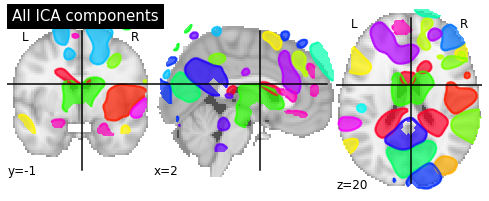

In [8]:
plot_prob_atlas(canica_components_img, title='All ICA components')

In [6]:
dictlearning_components_img = dict_learning.components_img_
dictlearning_components_img.to_filename('/home/bpho/Documents/dictionary_learning_resting_state.nii.gz')

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/numpy/ma/core.py:2832: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


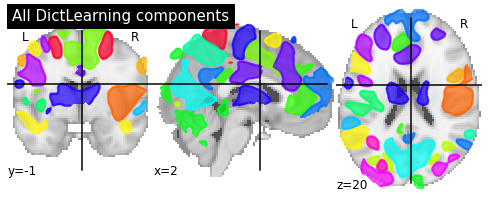

In [7]:
plot_prob_atlas(dictlearning_components_img,
                title='All DictLearning components')